<a href="https://colab.research.google.com/github/rachitjaiswall/Online-Retail-Customer-Segmentation-Unsupervised-ML/blob/main/Online_Retail_Customer_Segmentation_Unsupervised_ML_End_Course_Module_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Name**    - Online Retail Customer Segmentation Unsupervised ML



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual
##### **Rachit Jaiswal**


# **Project Summary -**

In this project focused on unsupervised machine learning, we aim to analyze a dataset containing transactions made between December 1, 2010, and December 9, 2011, by a UK-based online retail company. The company specializes in offering unique gifts suitable for various occasions. Notably, a considerable portion of its customer base comprises wholesale buyers. Our main objective is to identify distinct customer segments within this dataset, particularly focusing on retail customers. By doing so, we aim to provide valuable insights to the company, enabling it to better understand its diverse customer base and tailor its strategies to meet their needs effectively.






# **GitHub Link -**

https://github.com/rachitjaiswall/Online-Retail-Customer-Segmentation-Unsupervised-ML.git





# **Problem Statement**


* Every business wants to understand its customers really well.
* This means looking at how people use the company's services.
* Each customer might use the services in their own way.
* The challenge is to figure out the different types of customers for this delivery company.
* We want to find out and describe how these customers use the company's services in different ways.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

from scipy.stats import f_oneway
from scipy.stats import ttest_1samp
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
path=('/content/drive/MyDrive/Online Retail.csv')
dataset=pd.read_csv(path)

### Dataset First View

In [4]:
# Dataset First Look
dataset.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

    InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/10 8:26       2.55     17850.0  United Kingdom  
1  12/1/10 8:26       3.39     17850.0  United Kingdom  
2  12/1/10 8:26       2.75     17850.0  United Kingdom  
3  12/1/10 8:26       3.39     17850.0  United Kingdom  
4  12/1/10 8:26       3.39     17850.0  United Kingdom

### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
dataset.shape

(541909, 8)

### Dataset Information

In [6]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
dataset.duplicated().sum()

5268

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
dataset.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

<Axes: >

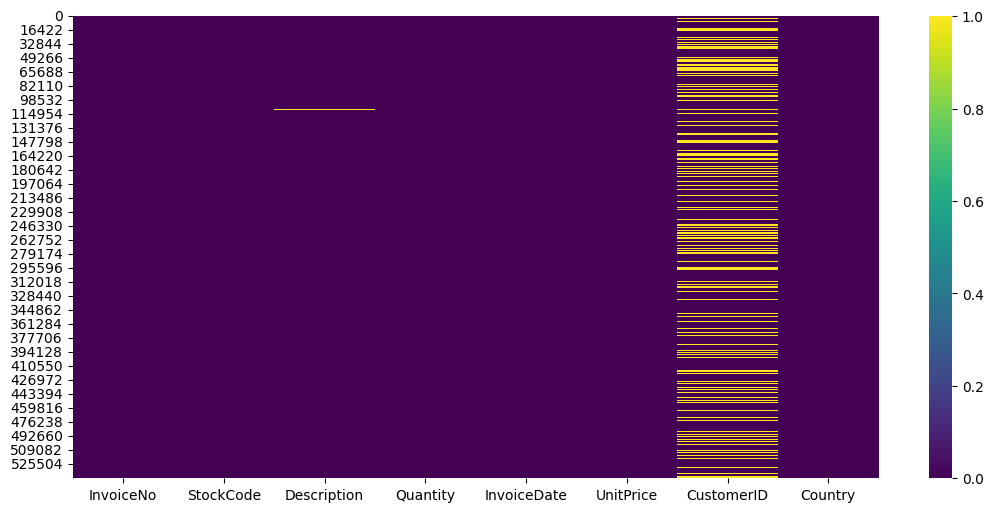

In [9]:
# Visualizing the missing values using heatmap

# Set figure size
plt.figure(figsize=(13,6))

# Create heatmap to visualize null values in dataset
sns.heatmap(dataset.isnull(), cmap='viridis')

### What did you know about your dataset?

* The dataset contains 541909 rows and 8 columns.

* Each row represents a transaction made by the company.

* The columns in the dataset are:



The dataset appears to contain information about transactions conducted by the UK-based online retail company between December 1, 2010, and December 9, 2011.

The company specializes in selling a variety of products, as indicated by the descriptions provided in the dataset.

Each transaction includes details such as the quantity of items sold, the unit price, and the customer involved, which can be useful for analyzing customer behavior and preferences, as well as for understanding sales trends over time and across different regions.

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
dataset.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [11]:
# Dataset Describe
dataset.describe()

Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

### Variables Description

InvoiceNo: Invoice number of the transaction.

StockCode: Stock code of the item sold.

Description: Description of the item sold.

Quantity: Quantity of the item sold in the transaction.

InvoiceDate: Date and time when the transaction occurred.

UnitPrice: Price per unit of the item sold.

CustomerID: ID of the customer involved in the transaction.

Country: Country where the transaction took place.

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
dataset.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [13]:
# Dropping Duplicate Rows
dataset=dataset.drop_duplicates()
len(dataset[dataset.duplicated()])

0

In [14]:
# after removing duplicates checking data shape
dataset.shape

(536641, 8)

In [15]:
# we have to drop some InvoiceNo which are starts with 'C' because 'C' indicates a cancellation

dataset['InvoiceNo'] = dataset['InvoiceNo'].astype('str')
dataset[dataset['InvoiceNo'].str.contains('C')]

InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

          InvoiceDate  UnitPrice  CustomerID         Country  
141      12/1/10 9:41      27.50     14527.0  United Kingdom  
154      12/1/10 9:49       4.65     15311.0  United Kingdom  
235     12/1/10 10:24       1.65     17548.0  United Kingdom  
236     12/1/10 10:24       0.29     17548.0  United Kingdom  
237     12/1/10 10:24       0.29     17548.0  United Kingdom  
...               ...        ...         ...             ...  
540449   12/9/11 9:57       0.83     14397.0  United Kingdom  
541541  12/9/11 10:28     224.69     15498.0  United Kingdom  
541715  12/9/11 11:57      10.95     15311.0  United Kingdom  
541716  12/9/11 11:58       1.25     17315.0  United Kingdom  
541717  12/9/11 11:58       1.25     17315.0  United Kingdom  

[9251 rows x 8 columns]

In [16]:
# Filter out rows with 'C' in InvoiceNo (indicating canceled transactions)
dataset=dataset[~dataset['InvoiceNo'].str.contains('C')]

In [17]:
# after droping cancelled products, the data shape
dataset.shape

(527390, 8)

In [18]:
# Convert invoice Data column into 'year','month','day','hour','minute','second'

dataset['InvoiceDate'] = pd.to_datetime(dataset['InvoiceDate'])
dataset['InvoiceDate_year'] = dataset['InvoiceDate'].dt.year
dataset['InvoiceDate_month'] = dataset['InvoiceDate'].dt.month
dataset['InvoiceDate_day'] = dataset['InvoiceDate'].dt.day
dataset['InvoiceDate_hour'] = dataset['InvoiceDate'].dt.hour
dataset['InvoiceDate_minute'] = dataset['InvoiceDate'].dt.minute
dataset['InvoiceDate_second'] = dataset['InvoiceDate'].dt.second

In [19]:
# checking all columns and data types
print("Columns and their data types")
pd.DataFrame(dataset.dtypes).rename(columns = {0:'dtype'})

Columns and their data types


dtype
InvoiceNo                   object
StockCode                   object
Description                 object
Quantity                     int64
InvoiceDate         datetime64[ns]
UnitPrice                  float64
CustomerID                 float64
Country                     object
InvoiceDate_year             int32
InvoiceDate_month            int32
InvoiceDate_day              int32
InvoiceDate_hour             int32
InvoiceDate_minute           int32
InvoiceDate_second           int32

### What all manipulations have you done and insights you found?

* I removed duplicate values present in the dataset to ensure data integrity and accuracy.

* Rows with InvoiceNo starting with 'C' were dropped from the dataset as they indicate cancellations or returns.

* The InvoiceDate column was parsed to extract separate columns for year, month, day, hour, minute, and second, providing more granular insights into the timing of transactions.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Bar plot to show Top 5 Country based on the Most Numbers Customers

In [20]:
# Chart - 1 visualization code

# Analysis of country Variable
countrydf=dataset['Country'].value_counts().reset_index()
countrydf.rename(columns={'Country': 'Country_Name'}, inplace=True)
countrydf.rename(columns={'count': 'Count'}, inplace=True)
countrydf.head()

Country_Name   Count
0  United Kingdom  482479
1         Germany    9027
2          France    8393
3            EIRE    7883
4           Spain    2480

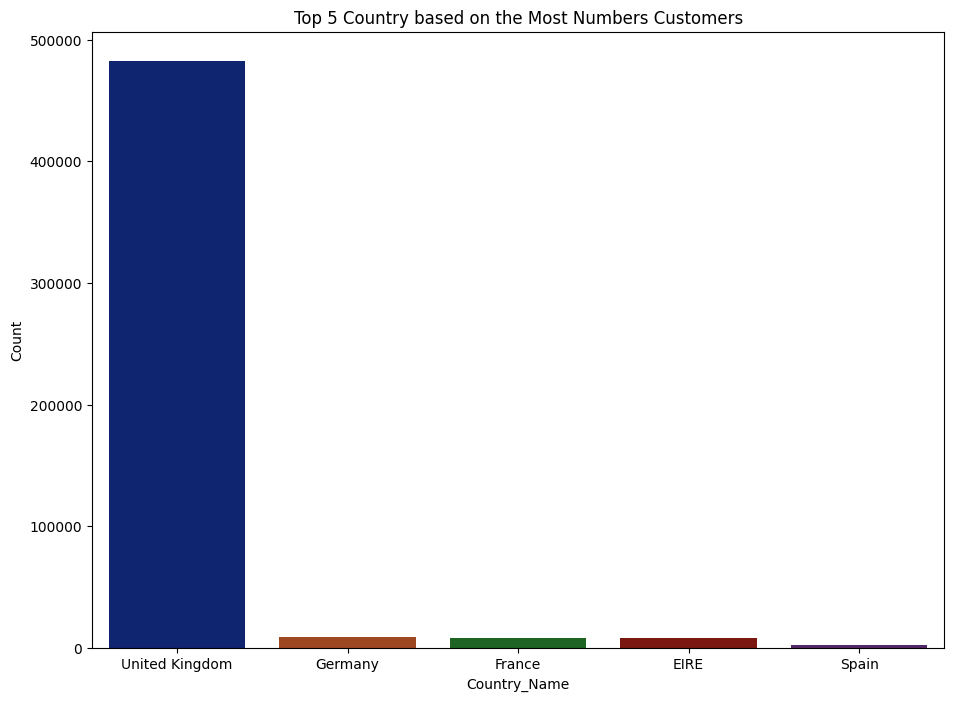

In [21]:
plt.figure(figsize=(11,8))
plt.title('Top 5 Country based on the Most Numbers Customers')
sns.barplot(x='Country_Name',y='Count',data=countrydf[:5],palette='dark')
plt.show()

##### 1. Why did you pick the specific chart?

* A bar chart is the preferred choice for visualizing categorical variables.
* It is particularly useful when comparing categorical variables.
* In this case, we utilize a bar chart to display the average number of customers across different countries.

##### 2. What is/are the insight(s) found from the chart?

The data reveals that the UK boasts the largest customer base, while Germany, France, and Ireland exhibit nearly equivalent customer counts.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


* Analyzing insights derived from the chart enables informed decision-making to positively impact the business.
* By pinpointing countries with the largest customer base, the company can strategically direct its marketing endeavors and allocate resources accordingly.
* This approach can lead to tailored marketing initiatives, enhanced customer interaction, and heightened sales performance within these pivotal markets.

#### Chart - 2 Bar plot between customer_id corresponding to their count

In [22]:
# Chart - 2 visualization code

# I have a certain amount of rows. Let us check if each row has a single customer or not. If not than how many customer ids I have.
# let me see the unique ids of customers
print('The no. of customers = ',dataset['CustomerID'].nunique())

The no. of customers =  4339


In [23]:
# So I have around 392732 rows but only 4339 customers. Let me now see who is most active customer.

# finding most active customer
active_customers=pd.DataFrame(dataset['CustomerID'].value_counts().sort_values(ascending=False).reset_index())
active_customers.rename(columns={'Count':'CustomerID','count':'Count'},inplace=True)
active_customers

CustomerID  Count
0        17841.0   7676
1        14911.0   5672
2        14096.0   5111
3        12748.0   4413
4        14606.0   2677
...          ...    ...
4334     16990.0      1
4335     13302.0      1
4336     13017.0      1
4337     17923.0      1
4338     13106.0      1

[4339 rows x 2 columns]

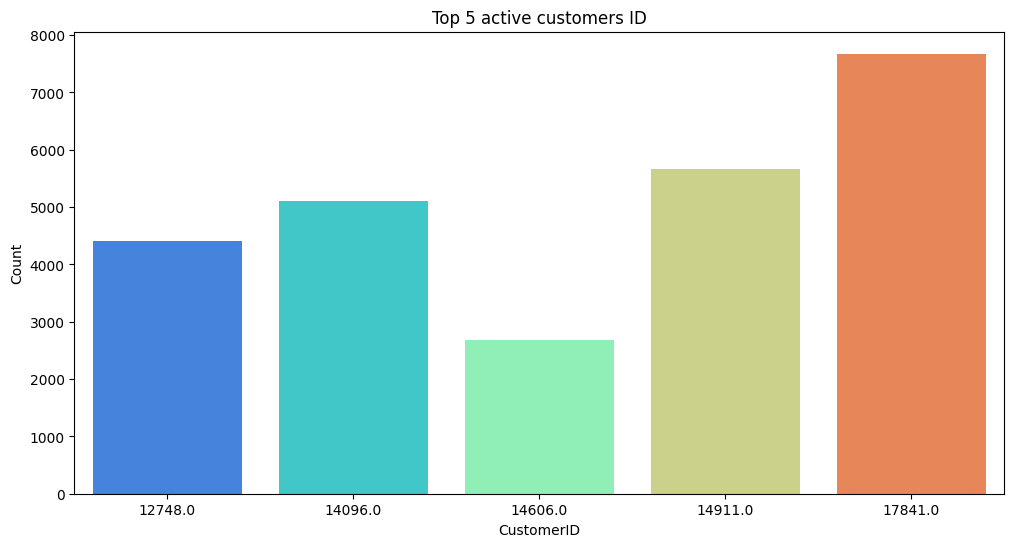

In [24]:
# visualizing bar chat of top 5 customers
plt.figure(figsize=(12,6))
plt.title('Top 5 active customers ID')
sns.barplot(x='CustomerID',y='Count',data=active_customers[:5],palette='rainbow')
plt.show()

##### 1. Why did you pick the specific chart?


* Bar charts are ideal for visualizing categorical variables.
* Comparing categorical variables is most effectively done using bar charts.


##### 2. What is/are the insight(s) found from the chart?

* The customers with the IDs 17841, 14911, 14096, 12748, and 14606 are the top 5 most active customers who have been consistently making purchases.
* These customers are regarded as special because they are likely to make more frequent purchases.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Identifying the most active customers allows the company to concentrate its attention on them.
* By focusing on nurturing and retaining these customers, the company can boost repeat purchases, leading to increased revenue.

#### Chart - 3 Bar plot to show Top 5 Country based least Numbers of Customers

<Axes: title={'center': 'Top 5 Country based least Numbers of  Customers'}, xlabel='Country_Name', ylabel='Count'>

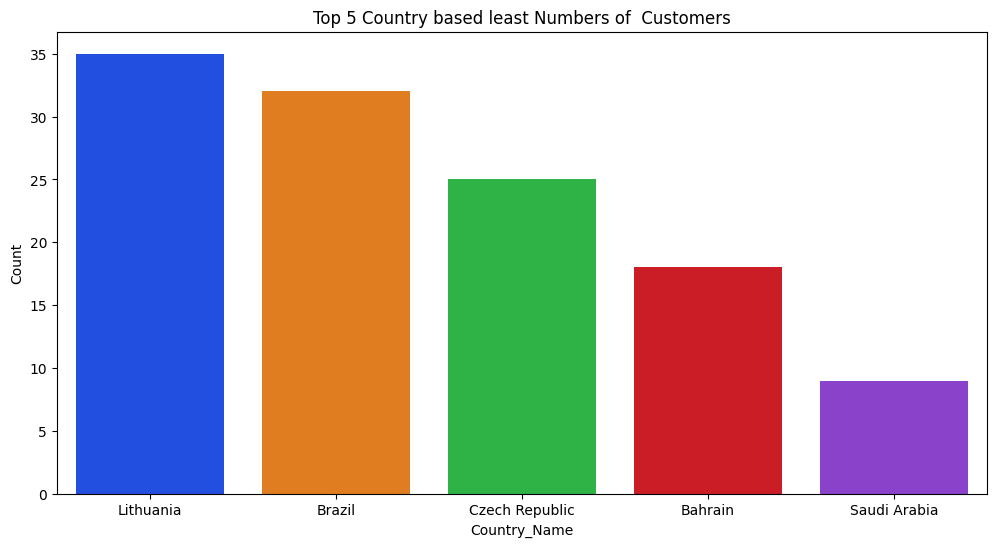

In [25]:
# Chart - 3 visualization code

plt.figure(figsize=(12,6))
plt.title('Top 5 Country based least Numbers of  Customers')
sns.barplot(x='Country_Name',y='Count',data=countrydf[-5:], palette='bright')

##### 1. Why did you pick the specific chart?

* A bar chart is the most suitable option for representing categorical variables.
* When comparing categorical variables, a bar chart is ideal.
* Here, we illustrate the average number of customers in different countries starting from the baseline.

##### 2. What is/are the insight(s) found from the chart?

Saudi Arabia has a low number of customers, making it one of the least represented countries in terms of customer count. Following closely behind, Bahrain is the country with the second-lowest number of customers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding the challenges or barriers in certain countries is crucial for a company to develop tailored strategies and penetrate those markets effectively. By identifying and addressing specific challenges, such as governance, sustainability, and economic disparities, the company can adapt its business approach to better serve the needs of the local population and overcome market barriers. This targeted approach can lead to increased customer attraction and business growth in the long term.

#### Chart - 4 Bar plot between top 5 stockname corresponding to their count

In [26]:
# Chart - 4 visualization code

# Analysis of StockCode Variable
StockCodedf=dataset['StockCode'].value_counts().reset_index()
StockCodedf.rename(columns={'StockCode': 'StockCode_Name'}, inplace=True)
StockCodedf.rename(columns={'count': 'Count'}, inplace=True)
StockCodedf.head()

StockCode_Name  Count
0         85123A   2259
1         85099B   2112
2          22423   2012
3          47566   1700
4          20725   1582

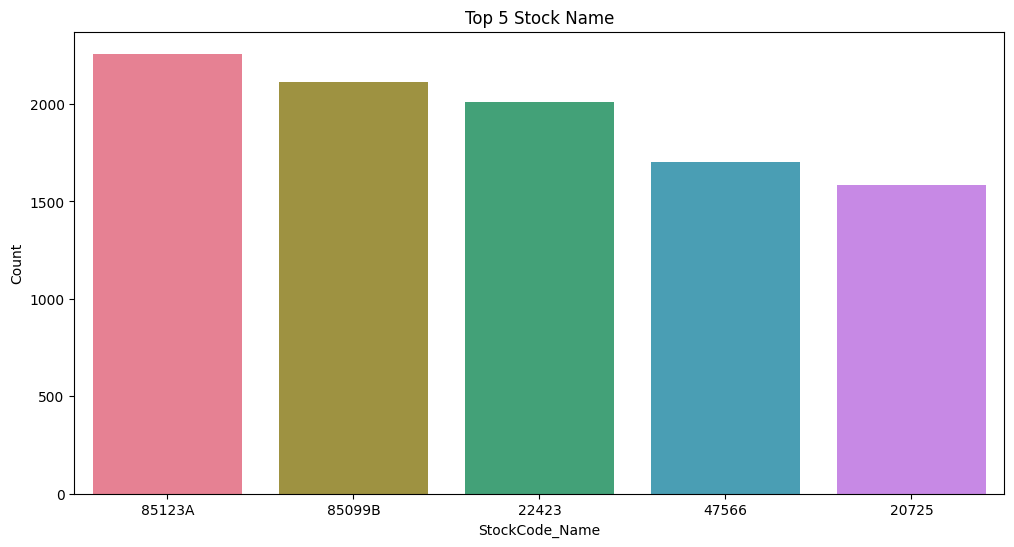

In [27]:
plt.figure(figsize=(12,6))
plt.title('Top 5 Stock Name')
sns.barplot(x='StockCode_Name',y='Count',data=StockCodedf[:5],palette='husl')
plt.show()

##### 1. Why did you pick the specific chart?

* The categorical variables is best visualised by Bar chart.

##### 2. What is/are the insight(s) found from the chart?

* StockCode-85123Ais the first highest selling product.
* StockCode-20725 is the least selling product.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Analyzing demand for top stock codes enables data-driven decisions on procurement, production, and restocking, optimizing sales, reducing excess inventory, and boosting revenue. By ensuring popular stock codes are available, customer demand is met, enhancing satisfaction and overall business performance.

#### Chart - 5 Bar plot between top 5 Bottom stockname corresponding to their count

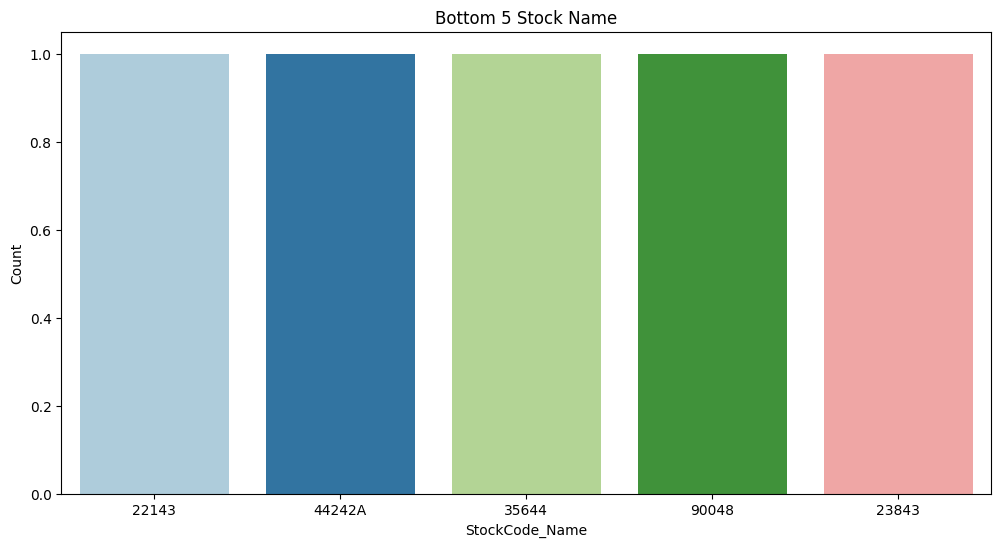

In [28]:
# Chart - 5 visualization code

plt.figure(figsize=(12,6))
plt.title('Bottom 5 Stock Name')
sns.barplot(x='StockCode_Name',y='Count',data=StockCodedf[-5:],palette='Paired')
plt.show()

##### 1. Why did you pick the specific chart?

* A bar chart is the most suitable option for representing categorical variables.
* When comparing categorical variables, a bar chart is ideal.

##### 2. What is/are the insight(s) found from the chart?

The bottom 5 stock codes mentioned have the least occurrence, indicating limited demand or popularity among customers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It has been observed that gained insights help to create positive business impact:

By identifying the least popular stock codes, the company can optimize its inventory management.and instead of these product company focuses on high demand product so reveue increases.

#### Chart - 6 Bar Plot for top 5 product

In [29]:
# Chart - 6 visualization code

# Analysis of Categorical Features

categorical_columns=list(dataset.select_dtypes(['object']).columns)
categorical_features=pd.Index(categorical_columns)
categorical_features

Index(['InvoiceNo', 'StockCode', 'Description', 'Country'], dtype='object')

In [30]:
# Analysis of Description Variable

Descriptiondf=dataset['Description'].value_counts().reset_index()
Descriptiondf.rename(columns={'Description': 'Description_Name'}, inplace=True)
Descriptiondf.rename(columns={'count': 'Count'}, inplace=True)
Descriptiondf

Description_Name  Count
0     WHITE HANGING HEART T-LIGHT HOLDER   2315
1                JUMBO BAG RED RETROSPOT   2112
2               REGENCY CAKESTAND 3 TIER   2009
3                          PARTY BUNTING   1700
4                LUNCH BAG RED RETROSPOT   1581
...                                  ...    ...
4202           TINY CRYSTAL BRACELET RED      1
4203        4 GOLD FLOCK CHRISTMAS BALLS      1
4204           ZINC STAR T-LIGHT HOLDER       1
4205     BLUE GINGHAM ROSE CUSHION COVER      1
4206         PAPER CRAFT , LITTLE BIRDIE      1

[4207 rows x 2 columns]

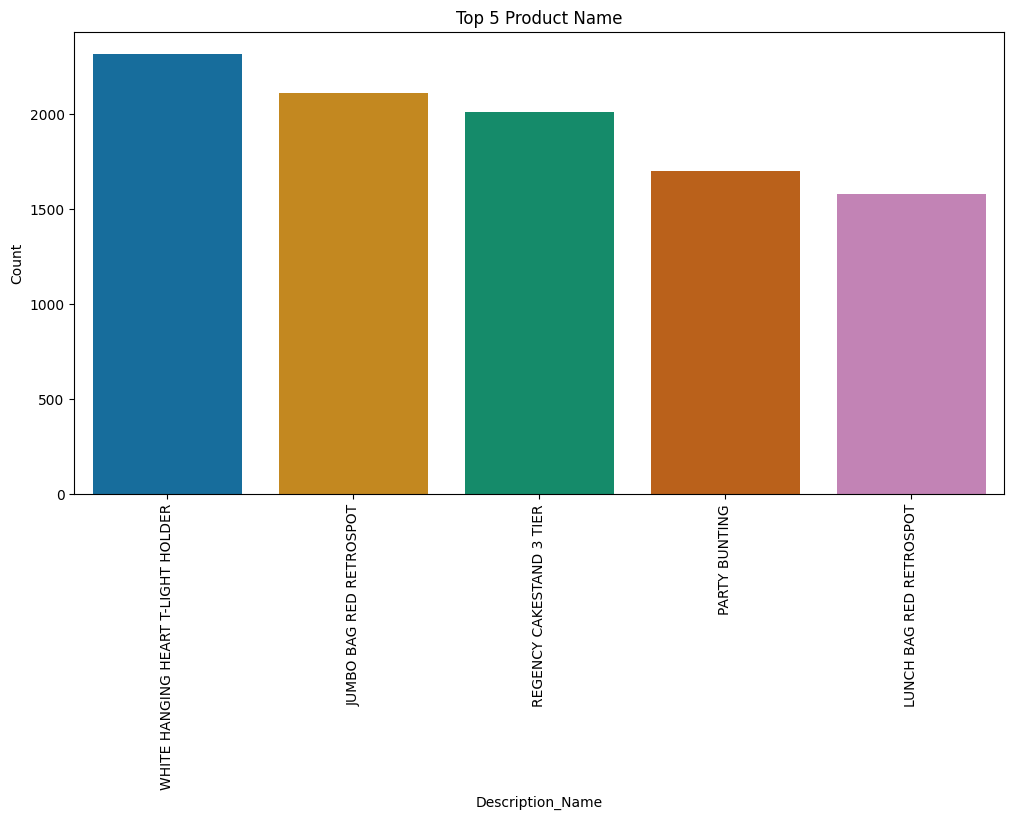

In [31]:
plt.figure(figsize=(12,6))
plt.title('Top 5 Product Name')
sns.barplot(x='Description_Name',y='Count',data=Descriptiondf[:5],palette='colorblind')
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts are ideal for comparing categorical variables effectively. They visually represent each category as a separate bar, making it easy to analyze and compare different groups of data based on their values.

##### 2. What is/are the insight(s) found from the chart?

* The top-selling product is the WHITE HANGING HEART T-LIGHT HOLDER, with approximately 2018 units sold.
* The second-highest seller is the RENGY CAKESTAND 3 TIER, with around 1723 units sold.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The high sales of top products, WHITE HANGING HEART T-LIGHT HOLDER and RENGY CAKESTAND 3 TIER, indicate strong demand and popularity. By ensuring adequate stock, targeted promotions, and leveraging e-commerce customer insights, the company can increase sales and revenue, build customer trust, and identify best-sellers for long-term success.

#### Chart - 7 Bar plot to show Bottom 5 product name

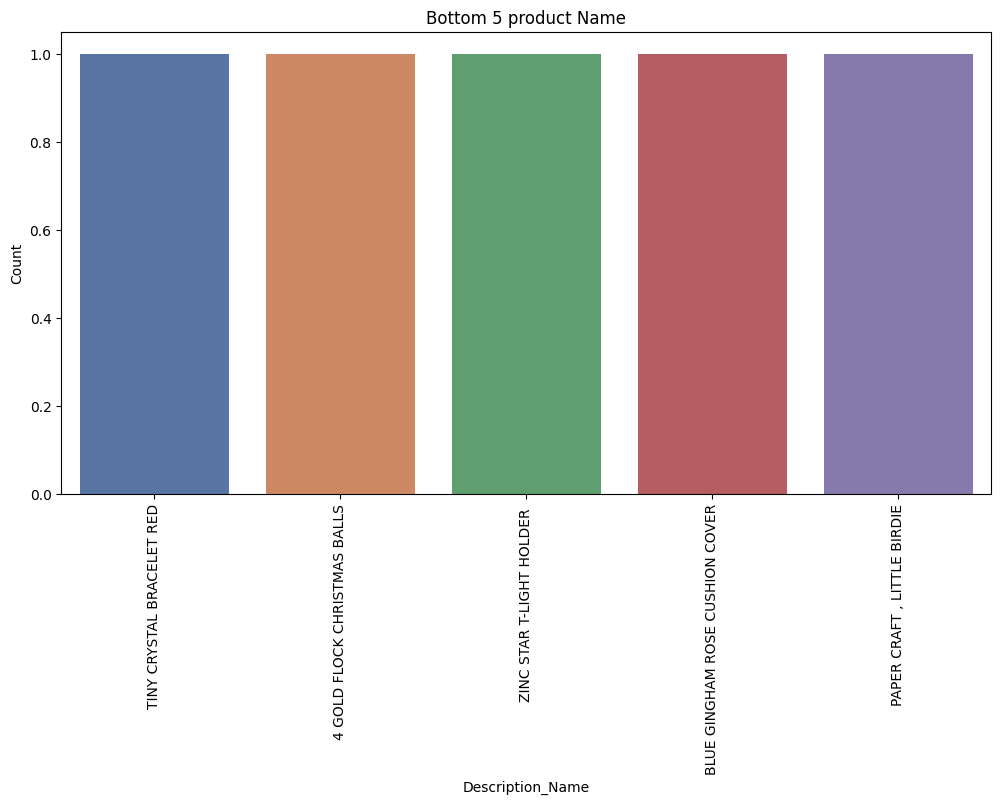

In [32]:
# Chart - 7 visualization code

plt.figure(figsize=(12,6))
plt.title('Bottom 5 product Name')
sns.barplot(x='Description_Name',y='Count',data=Descriptiondf[-5:], palette='deep')
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

* A bar chart is a visualization tool that displays counts or frequencies of categories along one axis and corresponding values on the other.
* For visualizing product counts, each bar represents a product, and the height indicates the count. This allows for easy comparison of product counts.

##### 2. What is/are the insight(s) found from the chart?

It has been observed that "TINY CRYSTAL BRACELET RED," "4 GOLD FLOCK CHRISTMAS BALLS," "ZINC STAR T-LIGHT HOLDER," "BLUE GINGHAM ROSE CUSHION COVER," and "PAPER CRAFT, LITTLE BIRDIE," have very low counts, indicating a limited demand or popularity among customers.

#### Chart - 8 Plot histogram for each numerical columns to check data distribution

In [33]:
# Chart - 8 visualization code

#Analysis Numeric Features

numerical_columns=list(dataset.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['Quantity', 'UnitPrice', 'CustomerID'], dtype='object')

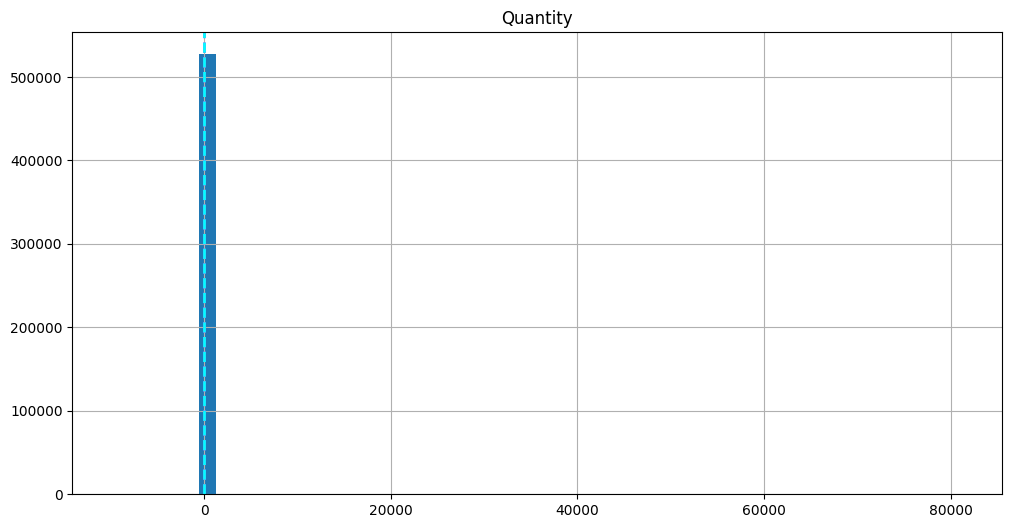

Skewness : 432.0874883289716
Kurtosis : 210393.63431854208


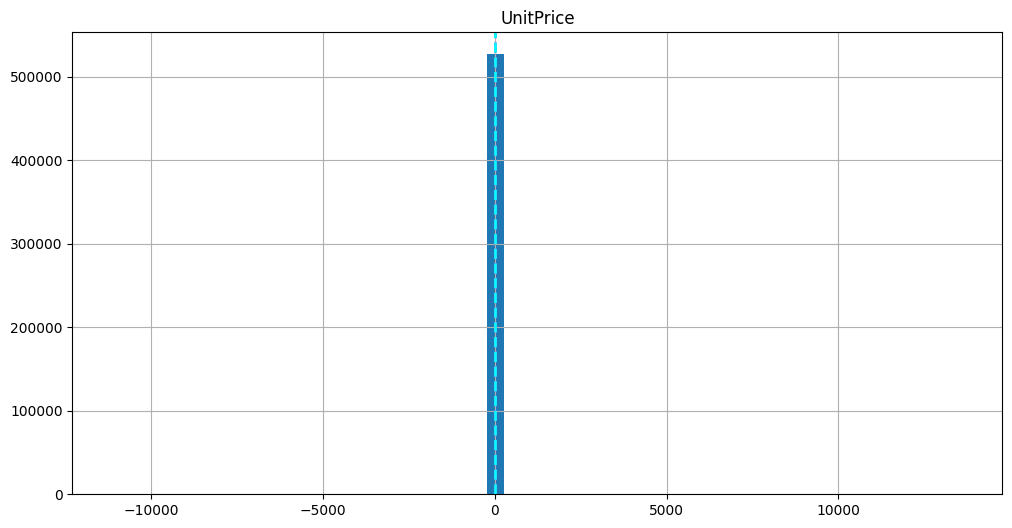

Skewness : 60.331902476539724
Kurtosis : 52037.4702051662


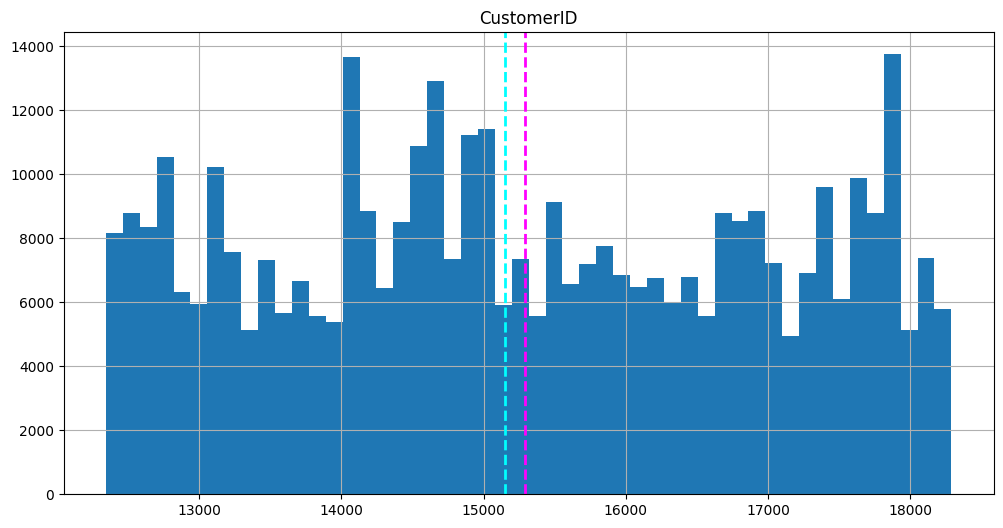

Skewness : 0.030195360172134714
Kurtosis : -1.1807001644923927


In [34]:
#Plot a bar plot for each numerical feature count with Hist Plot (except car_ID)

for col in numerical_features:
  fig=plt.figure(figsize=(12,6))
  ax=fig.gca()
  feature= (dataset[col])
  feature.hist(bins=50, ax=ax)
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
  plt.show()
  print( "Skewness :",dataset[col].skew())
  print( "Kurtosis :",dataset[col].kurt())

##### 1. Why did you pick the specific chart?

A histogram is a visual representation of quantitative data, organizing data points into specified ranges to show the distribution pattern. It provides insights into the frequency of data points within each range, aiding in understanding the data's distribution

##### 2. What is/are the insight(s) found from the chart?

* It has been observed that some of the data are almost normally distributed.
* some are positively distributed and some are highly positively distributed.
* some are negatively distributed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Outlier detection is crucial for data analysis, as it helps identify and handle extreme data points that can impact results. Outliers can result from errors or natural variations. Proper handling of outliers ensures the accuracy of data analysis and improves machine learning model performance.

#### Chart - 9 Plot boxplot on each numerical columns to check outliers

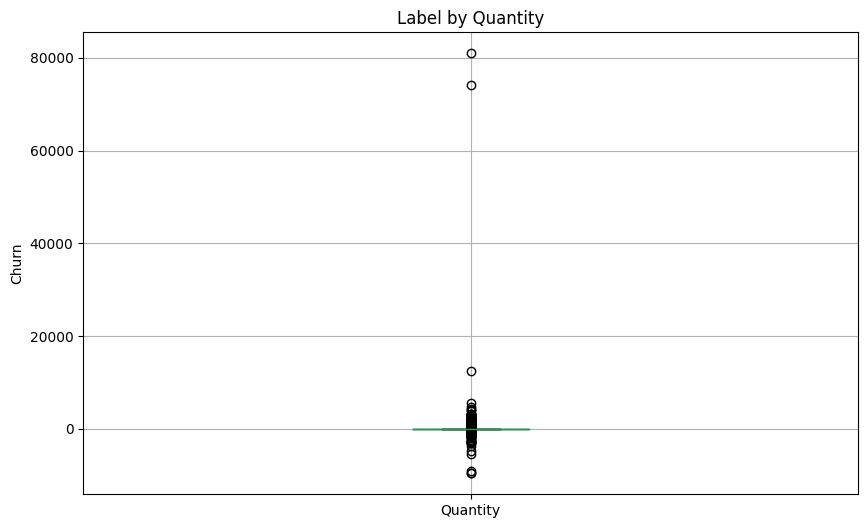

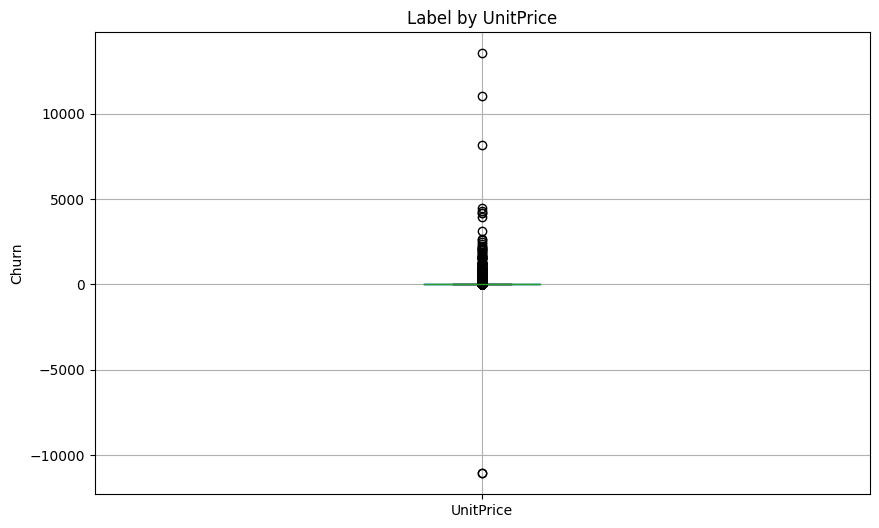

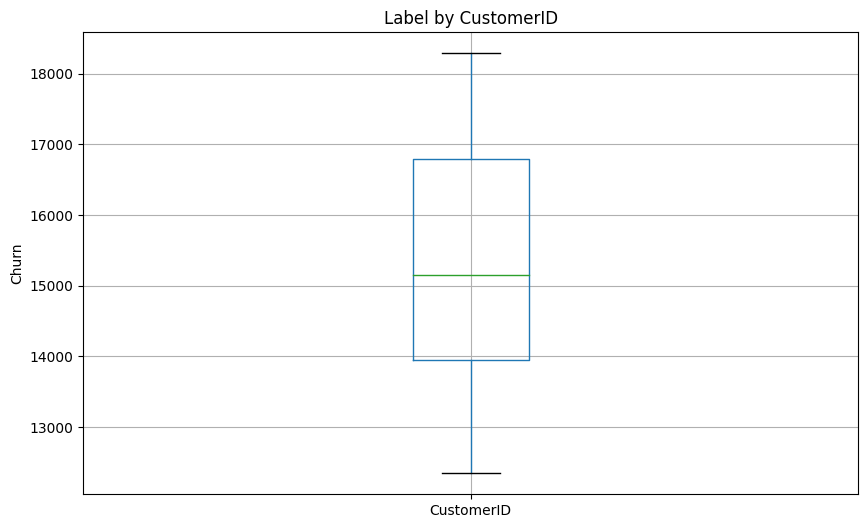

In [35]:
# Chart - 9 visualization code

# plot a boxplot for the label by each numerical feature

for col in numerical_features:
    fig = plt.figure(figsize=(10,6))
    ax = fig.gca()
    dataset.boxplot(col)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Churn")
plt.show()

##### 1. Why did you pick the specific chart?

Box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups.

##### 2. What is/are the insight(s) found from the chart?

A majority of the columns do not exhibit the presence of outliers, while some columns contain data points that fall outside the typical range of values.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Identifying outliers in data through boxplots helps improve data accuracy and reliability, leading to better decision-making and enhanced business performance. Addressing outliers can resolve data quality issues and ensure more precise analysis and model outcomes.

#### Chart - 10 Correlation Heatmap

In [36]:
dataset.dtypes

InvoiceNo                     object
StockCode                     object
Description                   object
Quantity                       int64
InvoiceDate           datetime64[ns]
UnitPrice                    float64
CustomerID                   float64
Country                       object
InvoiceDate_year               int32
InvoiceDate_month              int32
InvoiceDate_day                int32
InvoiceDate_hour               int32
InvoiceDate_minute             int32
InvoiceDate_second             int32
dtype: object

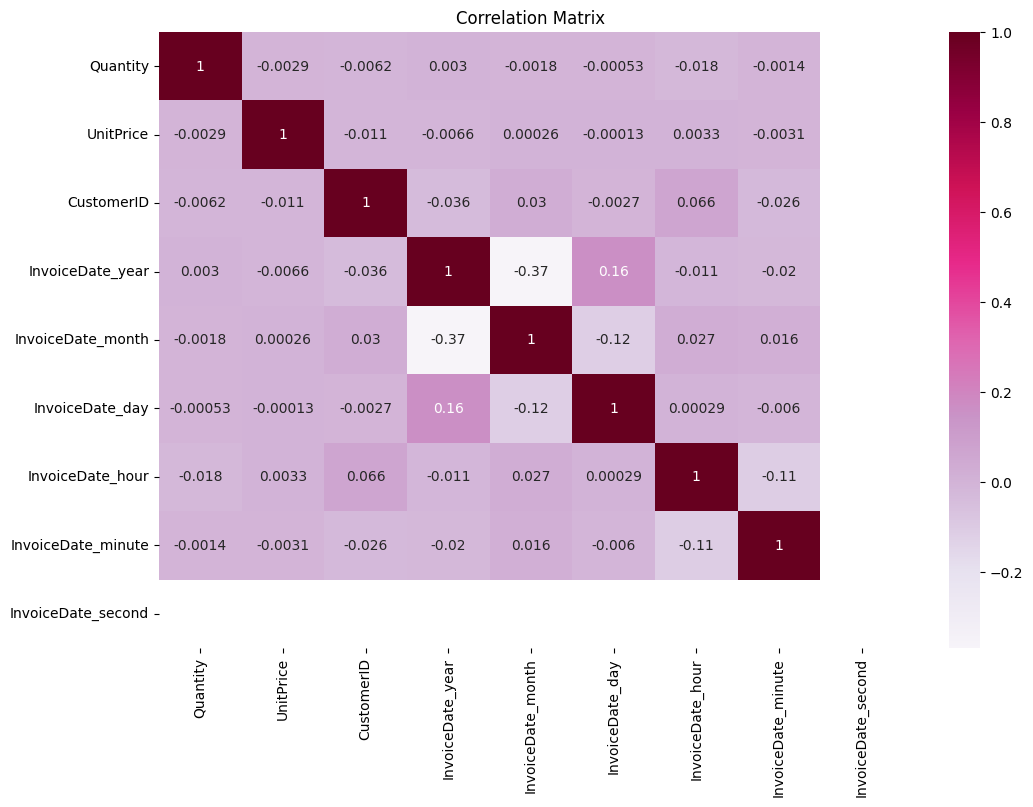

In [37]:
# Chart - 10 visualization code

# Compute the correlation matrix
correlation = dataset[['Quantity','UnitPrice','CustomerID','InvoiceDate_year','InvoiceDate_month','InvoiceDate_day','InvoiceDate_hour','InvoiceDate_minute','InvoiceDate_second']].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap((correlation), annot=True, cmap='PuRd')
plt.title('Correlation Matrix')
plt.show()

##### 1. Why did you pick the specific chart?

Correlation analysis can reveal meaningful relationships between different metrics or groups of metrics. Information about those connections can provide new insights and reveal interdependencies, even if the metrics come from different parts of the business.

##### 2. What is/are the insight(s) found from the chart?

* There is positive correlation between InvoiceDate_day and InvoiceDate_month.
* There is positive correlation between InvoiceDate_minute and InvoiceDate_hour.
* Positive correlation between InvoiceDate_hour and InvoiceDate_month.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

* The average values of invoices remain consistent across various months.
* The average quantity equals a predetermined value.
* The average price per unit matches a predetermined value.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.


Null hypothesis (H0): There is no difference in the average invoice
values among various months.

Alternative hypothesis (H1): There exists a difference in the average invoice values among different months.

Type of Test: One-way ANOVA test.

#### 2. Perform an appropriate statistical test.

In [38]:
# Perform Statistical Test to obtain P-Value

# Extract the "InvoiceDate_Month" column
invoice_months = dataset['InvoiceDate_month']

# Prepare the data for the one-way ANOVA test
groups = [dataset[dataset['InvoiceDate_month'] == month]['InvoiceDate_month'] for month in invoice_months.unique()]

# Perform the one-way ANOVA test
f_statistic, p_value = f_oneway(*groups)


# Set the significance level (alpha)
alpha = 0.05

# Compare p-value to the significance level
if p_value < alpha:
    print("Reject null hypothesis. At least one of the means of invoices across different months is different.")
else:
    print("Fail to reject null hypothesis. The means of invoices across different months are equal.")

Reject null hypothesis. At least one of the means of invoices across different months is different.


##### Which statistical test have you done to obtain P-Value?

I employed the F-statistic, a common tool in statistical analysis, particularly in ANOVA tests. ANOVA helps compare means of multiple groups to identify significant differences. The F-statistic assesses the variation between group means against the variation within groups.

##### Why did you choose the specific statistical test?


I chose to utilize the F-statistic test because the data exhibits an approximate normal distribution. This choice is made to ensure the appropriateness of the statistical test.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis (H0): The average quantity equals a predetermined value.

Alternative hypothesis (H1): The average quantity differs from the specified value.

#### 2. Perform an appropriate statistical test.

In [39]:
# Perform Statistical Test to obtain P-

# Extract the "Quantity" column
quantity = dataset['Quantity']

# Specify the value to test against
specified_value = 100  # For example, testing against a mean quantity of 10

# Perform the one-sample t-test
t_statistic, p_value = ttest_1samp(quantity, specified_value)


# Set the significance level (alpha)
alpha = 0.05

# Compare p-value to the significance level
if p_value < alpha:
    print("Reject null hypothesis. The mean quantity is significantly different from the specified value.")
else:
    print("Fail to reject null hypothesis. The mean quantity is not significantly different from the specified value.")

Reject null hypothesis. The mean quantity is significantly different from the specified value.


##### Which statistical test have you done to obtain P-Value?


The t-test for statistical analysis and obtained a result indicating rejection of the null hypothesis. This implies that the average quantity significantly deviates from the specified value.

##### Why did you choose the specific statistical test?


Given the skewed distribution of the data, the t-test is the preferred statistical method for analysis.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis (H0): The mean unit price is equal to a specified value.

Alternative hypothesis (H1): The mean unit price is not equal to the specified value.

#### 2. Perform an appropriate statistical test.

In [40]:
# Perform Statistical Test to obtain P-Value

# Extract the "UnitPrice" column
unit_price = dataset['UnitPrice']

# Specify the value to test against
specified_value = 110  # For example, testing against a mean unit price of 10

# Perform the one-sample t-test
t_statistic, p_value = ttest_1samp(unit_price, specified_value)

# Set the significance level (alpha)
alpha = 0.05

# Compare p-value to the significance level
if p_value < alpha:
    print("Reject null hypothesis. The mean unit price is significantly different from the specified value.")
else:
    print("Fail to reject null hypothesis. The mean unit price is not significantly different from the specified value.")

Reject null hypothesis. The mean unit price is significantly different from the specified value.


##### Which statistical test have you done to obtain P-Value?


I performed a t-test to derive the p-value, leading to the rejection of the null hypothesis. This indicates a notable distinction between the mean unit price and the predetermined value.

##### Why did you choose the specific statistical test?

  
Our data distribution is postively skewed.

So, for a skewed data we can use T-test for better result. Thus, I used t - test.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [41]:
# Handling Missing Values & Missing Value Imputation

#check for count of missing values in each column.
dataset.isna().sum()
dataset.isnull().sum()

InvoiceNo                  0
StockCode                  0
Description             1454
Quantity                   0
InvoiceDate                0
UnitPrice                  0
CustomerID            134658
Country                    0
InvoiceDate_year           0
InvoiceDate_month          0
InvoiceDate_day            0
InvoiceDate_hour           0
InvoiceDate_minute         0
InvoiceDate_second         0
dtype: int64

In [42]:
dataset.dropna(inplace=True)
dataset.shape

(392732, 14)

#### What all missing value imputation techniques have you used and why did you use those techniques?

I have removed rows with missing values in **Description** and **Customer ID**.

### 2. Handling Outliers

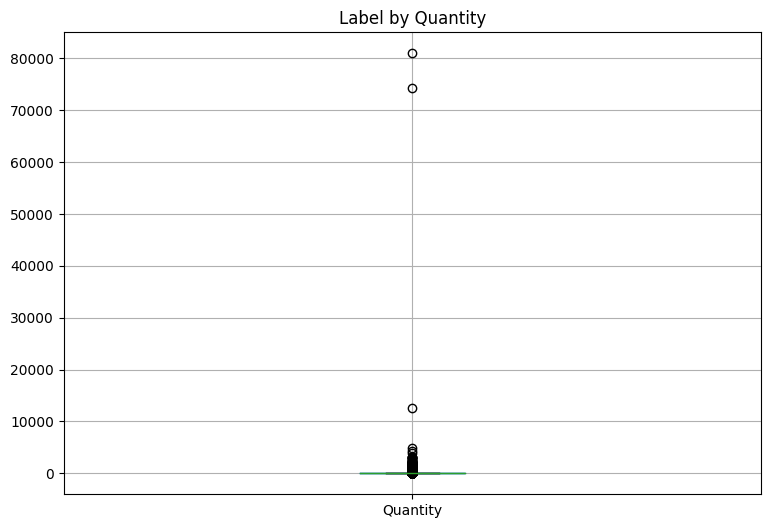

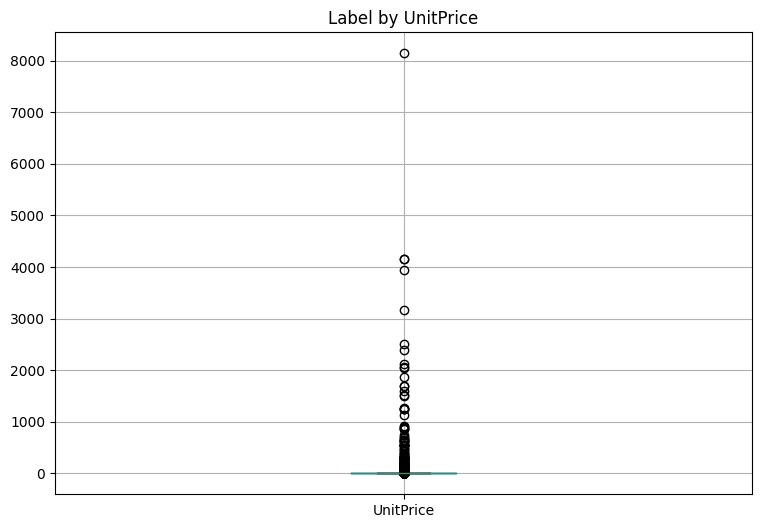

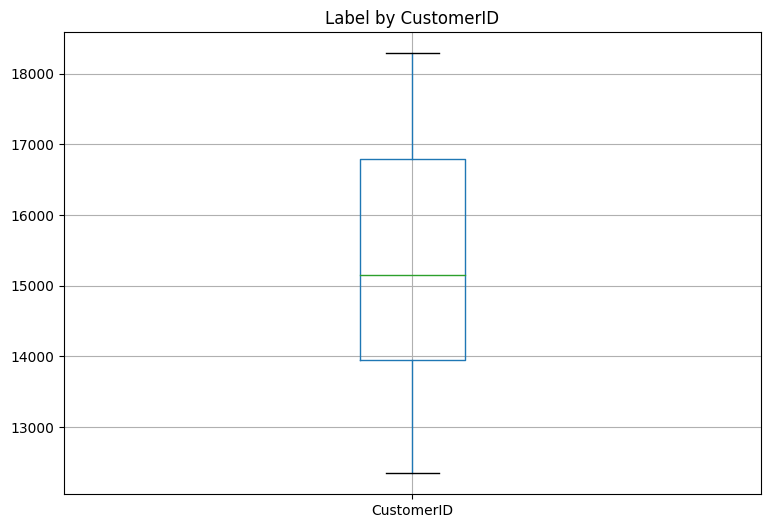

In [43]:
# Handling Outliers & Outlier treatments

# plot a boxplot for the label by each numerical feature

for col in numerical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    dataset.boxplot(col)
    ax.set_title('Label by ' + col)
    #ax.set_ylabel("Churn")
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

Retaining outliers within the 'Quantity' and 'UnitPrice' variables can offer valuable insights into customer behavior, preferences, and purchasing trends. These outliers might signify significant transactions, bulk orders, or distinct purchasing habits crucial for comprehensive customer segmentation. Eliminating outliers could result in the forfeiture of these insightful details, hence I opted to retain them.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [56]:
# Manipulate Features to minimize feature correlation and create new features

# Create a new features Day from Invoicedate
dataset['Day']=dataset['InvoiceDate'].dt.day_name()
dataset['TotalAmount']=dataset['Quantity']*dataset['UnitPrice']
dataset.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'InvoiceDate_year',
       'InvoiceDate_month', 'InvoiceDate_day', 'InvoiceDate_hour',
       'InvoiceDate_minute', 'InvoiceDate_second', 'Day', 'TotalAmount'],
      dtype='object')

In [57]:
# Manipulate Features to minimize feature correlation and create new features

# Create a new features Day from Invoicedate
dataset['Day']=dataset['InvoiceDate'].dt.day_name()
dataset['TotalAmount']=dataset['Quantity']*dataset['UnitPrice']
dataset.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'InvoiceDate_year',
       'InvoiceDate_month', 'InvoiceDate_day', 'InvoiceDate_hour',
       'InvoiceDate_minute', 'InvoiceDate_second', 'Day', 'TotalAmount'],
      dtype='object')

count    392732.000000
mean         22.629195
std         311.083465
min           0.000000
25%           4.950000
50%          12.390000
75%          19.800000
max      168469.600000
Name: TotalAmount, dtype: float64

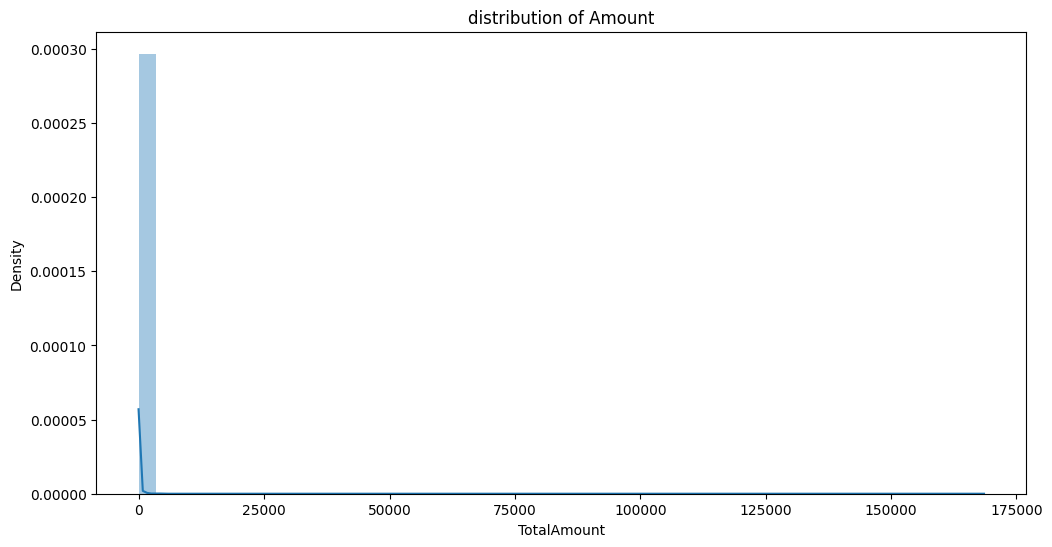

In [58]:
# Lets check distribution of TotalAmount column which i have created:

plt.figure(figsize=(12,6))
plt.title('distribution of Amount')
sns.distplot(dataset['TotalAmount'])
dataset['TotalAmount'].describe()

In [59]:
# lets create dataframe of Day column:
day_df=dataset['Day'].value_counts().reset_index()
day_df.rename(columns={'Day': 'Day_Names'}, inplace=True)
day_df.rename(columns={'count': 'Count'}, inplace=True)
day_df

Day_Names  Count
0   Thursday  79260
1  Wednesday  68043
2    Tuesday  65747
3     Monday  64237
4     Sunday  61214
5     Friday  54231

<Axes: title={'center': 'Day'}, xlabel='Day_Names', ylabel='Count'>

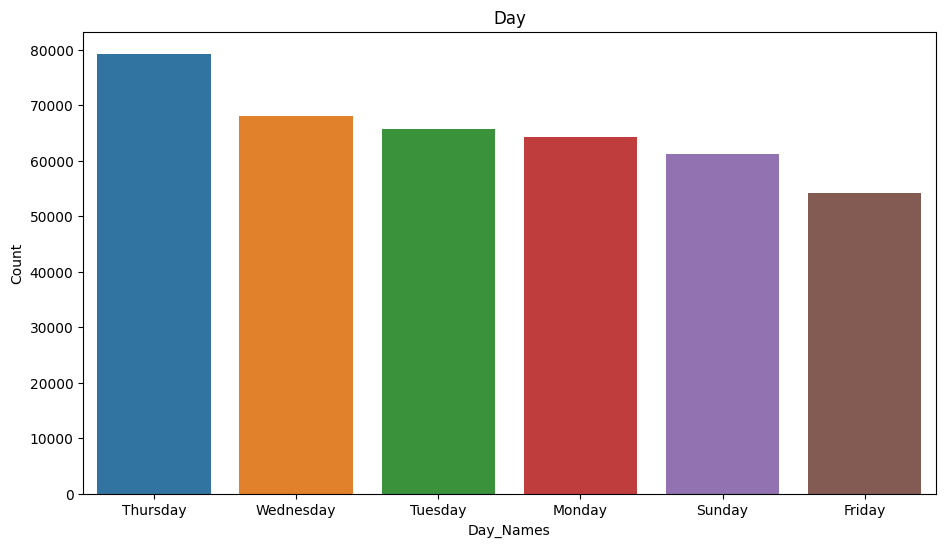

In [60]:
# draw bar chart of dataframe which i created:
plt.figure(figsize=(11,6))
plt.title('Day')
sns.barplot(x='Day_Names',y='Count',data=day_df,palette='tab10')

Most of the customers have purches the items in Thursday ,Wednesday and Tuesday

In [61]:
# lets create dataframe of InvoiceDate_month column:
monthdf=dataset['InvoiceDate_month'].value_counts().reset_index()
monthdf.rename(columns={'InvoiceDate_month': 'Month_Name'}, inplace=True)
monthdf.rename(columns={'count': 'Count'}, inplace=True)
monthdf

Month_Name  Count
0           11  63182
1           10  48796
2           12  42699
3            9  39671
4            5  28075
5            6  26926
6            3  26872
7            8  26796
8            7  26582
9            4  22435
10           1  20991
11           2  19707

<Axes: title={'center': 'Month'}, xlabel='Month_Name', ylabel='Count'>

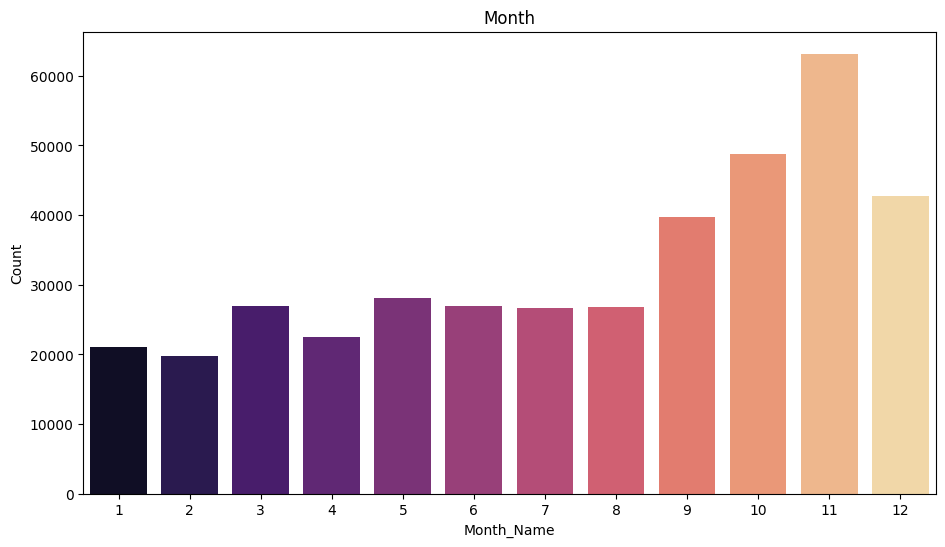

In [62]:
# create bar chart of dataframe which i created:
plt.figure(figsize=(11,6))
plt.title('Month')
sns.barplot(x='Month_Name',y='Count',data=monthdf,palette='magma')


The majority of customers made gift purchases during November, October, and December, while fewer customers made purchases during April, January, and February.

In [63]:
# create dataframe of InvoiceDate_hour column:
hourdf=dataset['InvoiceDate_hour'].value_counts().reset_index()
hourdf.rename(columns={'InvoiceDate_hour': 'Hour_Name'}, inplace=True)
hourdf.rename(columns={'count': 'Count'}, inplace=True)
hourdf

Hour_Name  Count
0          12  70942
1          13  63024
2          14  53260
3          11  48373
4          15  44793
5          10  37775
6          16  23719
7           9  21928
8          17  12942
9           8   8688
10         19   3234
11         18   2896
12         20    778
13          7    379
14          6      1

<Axes: title={'center': 'Hour'}, xlabel='Hour_Name', ylabel='Count'>

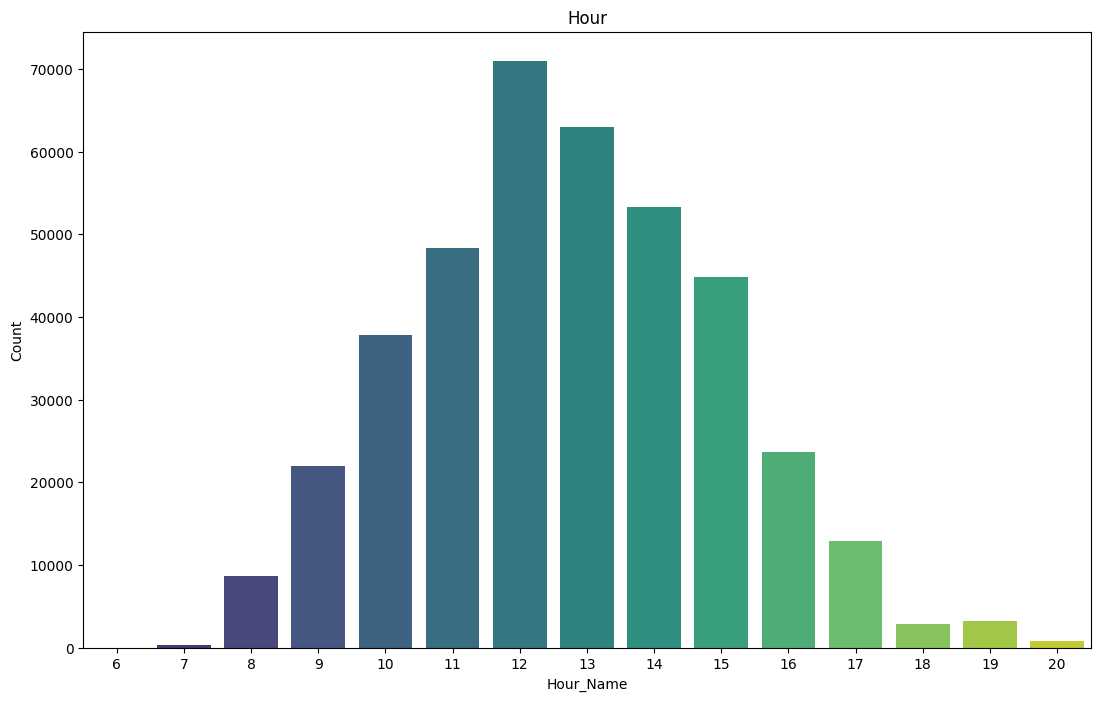

In [64]:
# create bar chart of dataframe which i created:
plt.figure(figsize=(13,8))
plt.title('Hour')
sns.barplot(x='Hour_Name',y='Count',data=hourdf,palette='viridis')


Based on the graph, the majority of customers made purchases during the afternoon.

In [65]:
# create function to divide time into 3 category:
def time_type(time):
  if(time==6 or time==7 or time==8 or time==9 or time==10 or time==11):
    return 'Morning'
  elif(time==12 or time==13 or time==14 or time==15 or time==16 or time==17):
    return 'Afternoon'
  else:
    return 'Evening'

dataset['Time_type']=dataset['InvoiceDate_hour'].apply(time_type)

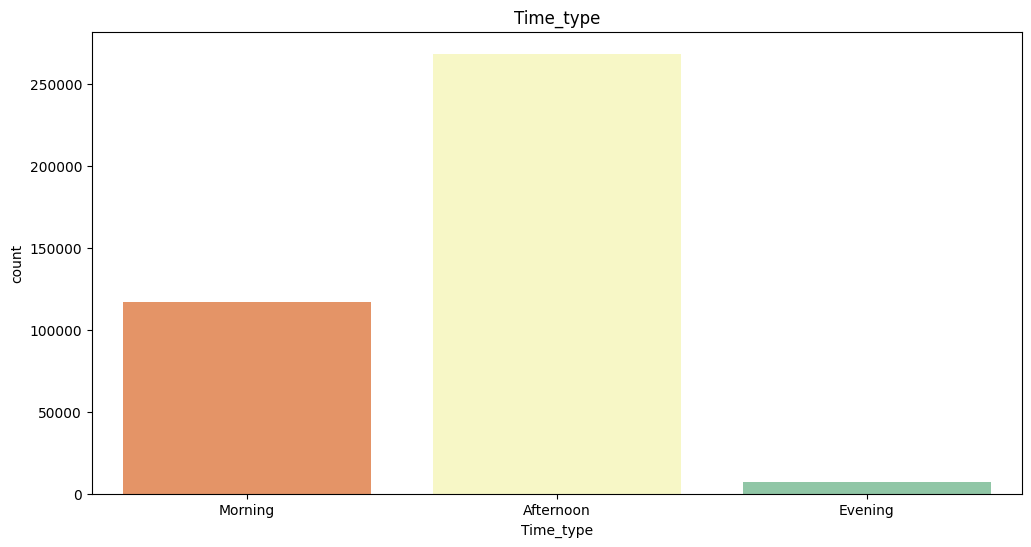

In [66]:
plt.figure(figsize=(12,6))
plt.title('Time_type')
sns.countplot(x='Time_type',data=dataset,palette='Spectral')
plt.show()


The afternoon saw the highest number of customer purchases, followed by a moderate number in the morning, and the fewest purchases were made in the evening.

###Creating RFM model


Before applying clustering algorithms, it's crucial to identify key quantitative factors for segmentation. One such method is the RFM model, which assesses Recency (days since last visit), Frequency (how often the customer purchases), and Monetary (total expenditure). These features are used to create scores for each customer. While other steps may involve further division and scoring, manual segmentation is possible without machine learning algorithms. Hence, we'll skip these additional steps and directly utilize RFM features for clustering algorithms.

* Recency = Latest Date - Last Inovice Data,

* Frequency = count of invoice no. of transaction(s),

* Monetary = Sum of Total Amount for each customer

In [67]:
#Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)

#Create RFM Modelling scores for each customer
rfm = dataset.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'TotalAmount': lambda x: x.sum()})

#Convert Invoice Date into type int
rfm['InvoiceDate'] = rfm['InvoiceDate'].astype(int)

#Rename column names to Recency, Frequency and Monetary
rfm.rename(columns={'InvoiceDate': 'Recency',
                         'InvoiceNo': 'Frequency',
                         'TotalAmount': 'Monetary'}, inplace=True)

rfm.reset_index().head()

CustomerID  Recency  Frequency  Monetary
0     12346.0      325          1  77183.60
1     12347.0        2        182   4310.00
2     12348.0       75         31   1797.24
3     12349.0       18         73   1757.55
4     12350.0      310         17    334.40

### 5. Data Transformation

In [68]:
#Descriptive Statistics (Recency)
rfm.Recency.describe()

count    4339.000000
mean       92.041484
std       100.007757
min         0.000000
25%        17.000000
50%        50.000000
75%       141.500000
max       373.000000
Name: Recency, dtype: float64

<Axes: xlabel='Recency', ylabel='Density'>

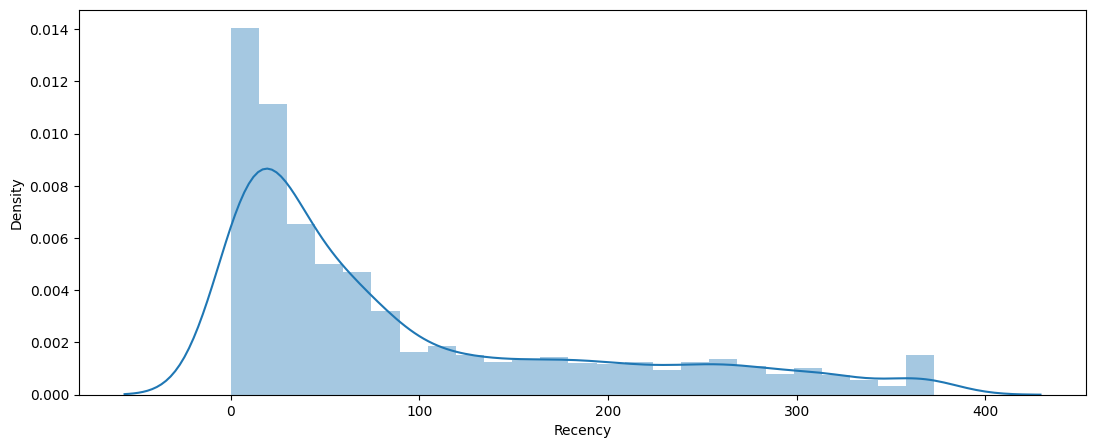

In [69]:
#Recency distribution plot
x = rfm['Recency']
plt.figure(figsize=(13,5))
sns.distplot(x)

In [70]:
#Descriptive Statistics (Monetary)
rfm.Monetary.describe()

count      4339.000000
mean       2048.215924
std        8984.248352
min           0.000000
25%         306.455000
50%         668.560000
75%        1660.315000
max      280206.020000
Name: Monetary, dtype: float64

<Axes: xlabel='Monetary', ylabel='Density'>

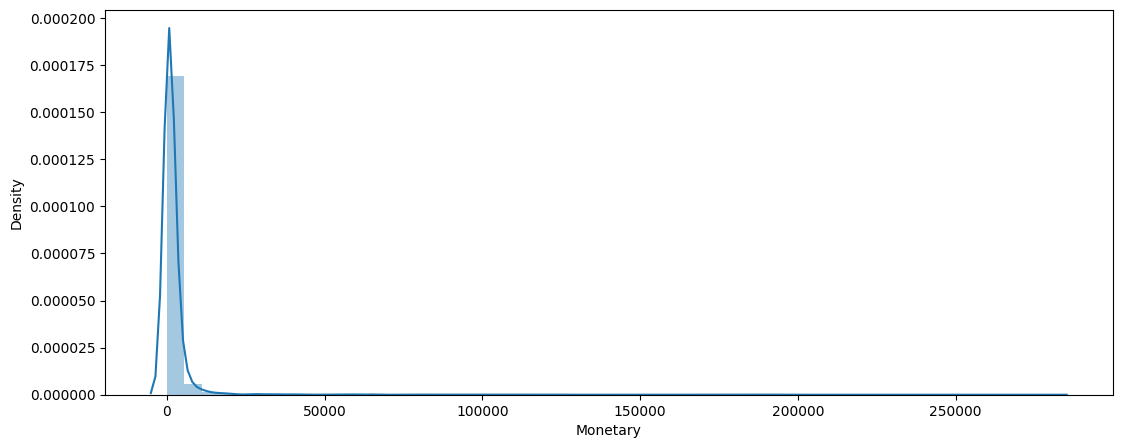

In [71]:
#Monateray distribution plot, taking observations which have monetary value less than 10000
import seaborn as sns
x = rfm['Monetary']
plt.figure(figsize=(13,5))
sns.distplot(x)

In [72]:
# Handle negative and zero values to avoid issues during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num

# Apply handle_neg_n_zero function to Recency and Monetary columns
rfm['Recency'] = [handle_neg_n_zero(x) for x in rfm['Recency']]
rfm['Monetary'] = [handle_neg_n_zero(x) for x in rfm['Monetary']]

# Perform Log transformation to bring data into normal or near-normal distribution
Log_Tfd_Data = rfm[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis=1).round(3)

# Calculate quantiles on the transformed data
quantiles = Log_Tfd_Data.quantile(q=[0.25, 0.5, 0.75])
quantiles = quantiles.to_dict()

# Define scoring functions for R, F, and M segments on transformed data
def RScoring(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

def FnMScoring(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

# Calculate R, F, and M segment values on the transformed data
rfm['R'] = Log_Tfd_Data['Recency'].apply(RScoring, args=('Recency', quantiles,))
rfm['F'] = rfm['Frequency'].apply(FnMScoring, args=('Frequency', quantiles,))
rfm['M'] = rfm['Monetary'].apply(FnMScoring, args=('Monetary', quantiles,))

# Calculate and add RFMGroup value column showing combined concatenated score of RFM
rfm['RFMGroup'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)

# Calculate and add RFMScore value column showing total sum of RFMGroup values
rfm['RFMScore'] = rfm[['R', 'F', 'M']].sum(axis=1)

rfm.head()

Recency  Frequency  Monetary  R  F  M RFMGroup  RFMScore
CustomerID                                                          
12346.0         325          1  77183.60  4  4  1      441         9
12347.0           2        182   4310.00  1  1  1      111         3
12348.0          75         31   1797.24  3  1  1      311         5
12349.0          18         73   1757.55  2  1  1      211         4
12350.0         310         17    334.40  4  1  1      411         6

<Axes: xlabel='Recency', ylabel='Density'>

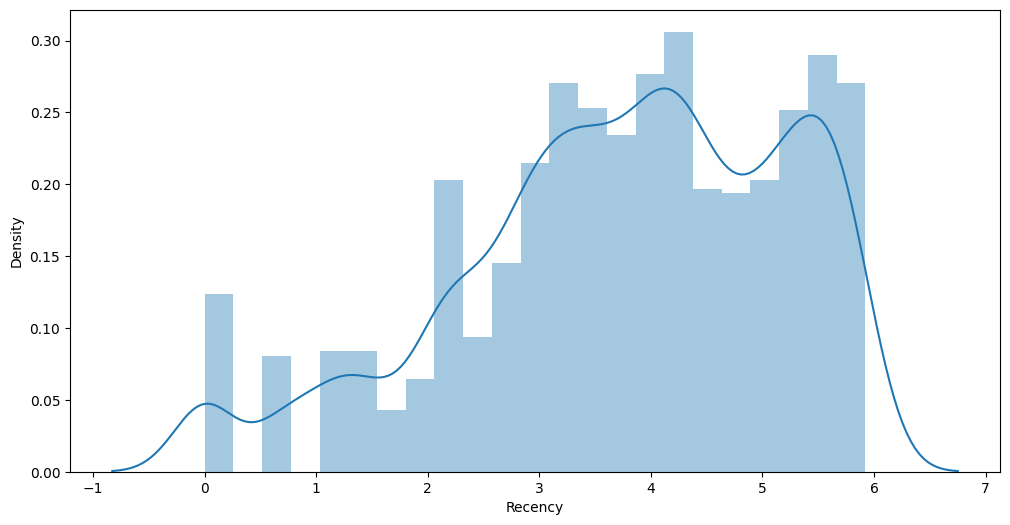

In [73]:
#Data distribution after data normalization for Recency
Recency_Plot = Log_Tfd_Data['Recency']
plt.figure(figsize=(12,6))
sns.distplot(Recency_Plot)

<Axes: xlabel='Frequency', ylabel='Density'>

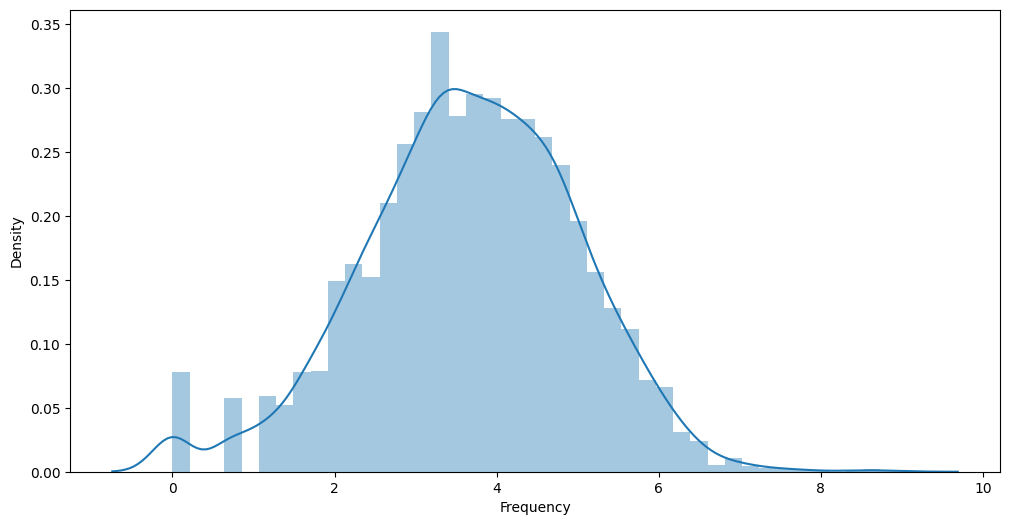

In [74]:
#Data distribution after data normalization for Frequency
Frequency_Plot = Log_Tfd_Data.query('Frequency < 1000')['Frequency']
plt.figure(figsize=(12,6))
sns.distplot(Frequency_Plot)

<Axes: xlabel='Monetary', ylabel='Density'>

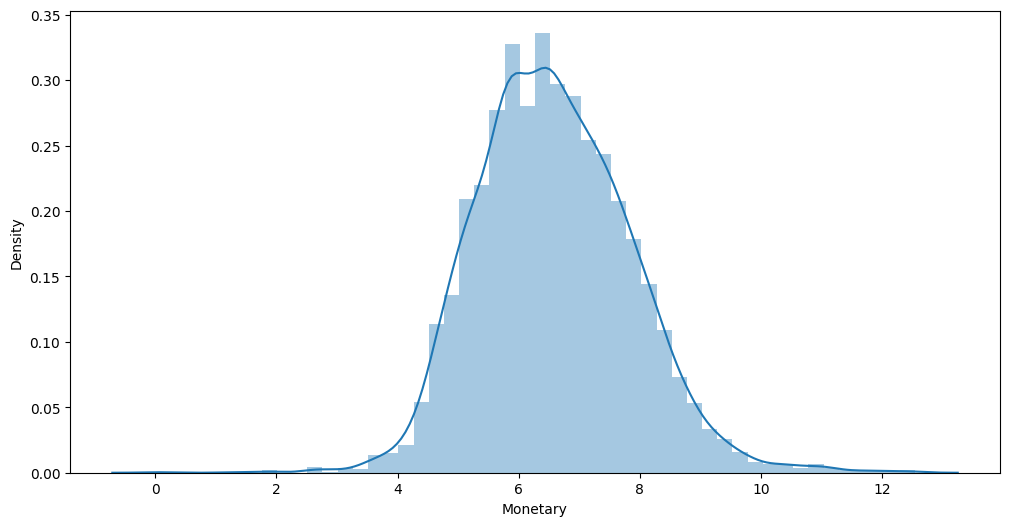

In [75]:
#Data distribution after data normalization for Monetary
Monetary_Plot = Log_Tfd_Data.query('Monetary < 10000')['Monetary']
plt.figure(figsize=(12,6))
sns.distplot(Monetary_Plot)

In [76]:
from sklearn import preprocessing
import math
rfm['Recency_log'] = rfm['Recency'].apply(math.log)
rfm['Frequency_log'] = rfm['Frequency'].apply(math.log)
rfm['Monetary_log'] = rfm['Monetary'].apply(math.log)

##### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?


As some of the data exhibit positive skewness, I applied a log transformation to achieve a more normal distribution.






### 6. Data Scaling

In [77]:
# Scaling your data

# lets scale on Recency and Monetary
features_rec_mon=['Recency_log','Monetary_log']
X_features_rec_mon=rfm[features_rec_mon].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon

##### Which method have you used to scale you data and why?


The StandardScaler method is employed here to scale the data. It rescales the data to have a mean of 0 and a standard deviation of 1. Since our dataset contains outliers, standardization is chosen due to its robustness to outliers. Even when outliers are present, they do not significantly affect the scaling process, making StandardScaler an appropriate choice.

### 8. Data Splitting

In [79]:
# Calculate quantiles on the transformed data
quantiles = rfm[['Recency_log', 'Frequency_log', 'Monetary_log']].quantile(q=[0.25, 0.5, 0.75])
quantiles = quantiles.to_dict()

# Define scoring functions for R, F, and M segments on transformed data
def RScoring(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

def FnMScoring(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

# Calculate R, F, and M segment values on the transformed data
rfm['R'] = rfm['Recency_log'].apply(RScoring, args=('Recency_log', quantiles,))
rfm['F'] = rfm['Frequency_log'].apply(FnMScoring, args=('Frequency_log', quantiles,))
rfm['M'] = rfm['Monetary_log'].apply(FnMScoring, args=('Monetary_log', quantiles,))

# Calculate and add RFMGroup value column showing combined concatenated score of RFM
rfm['RFMGroup'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)

# Calculate and add RFMScore value column showing total sum of RFMGroup values
rfm['RFMScore'] = rfm[['R', 'F', 'M']].sum(axis=1)

rfm.head()

Recency  Frequency  Monetary  R  F  M RFMGroup  RFMScore  \
CustomerID                                                             
12346.0         325          1  77183.60  4  4  1      441         9   
12347.0           2        182   4310.00  1  1  1      111         3   
12348.0          75         31   1797.24  3  3  1      331         7   
12349.0          18         73   1757.55  2  2  1      221         5   
12350.0         310         17    334.40  4  4  3      443        11   

            Recency_log  Frequency_log  Monetary_log  
CustomerID                                            
12346.0        5.783825       0.000000     11.253942  
12347.0        0.693147       5.204007      8.368693  
12348.0        4.317488       3.433987      7.494007  
12349.0        2.890372       4.290459      7.471676  
12350.0        5.736572       2.833213      5.812338

## ***7. ML Model Implementation***

Before applying the K-means clustering algorithm, it's essential to determine the appropriate number of clusters. This is achieved through methods such as evaluating the Silhouette Score and employing the Elbow method to find the optimal number of clusters.

### Applying Silhouette Score Method on Recency and Monetary

In [81]:
# ML Model - 1 Implementation

range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.42043960957985754
For n_clusters = 3, silhouette score is 0.3426264907032349
For n_clusters = 4, silhouette score is 0.3647331611070875
For n_clusters = 5, silhouette score is 0.33676467988264974
For n_clusters = 6, silhouette score is 0.34377817613424394
For n_clusters = 7, silhouette score is 0.3475081518411719
For n_clusters = 8, silhouette score is 0.3386097655153988
For n_clusters = 9, silhouette score is 0.34543690273995703
For n_clusters = 10, silhouette score is 0.3475791714439969
For n_clusters = 11, silhouette score is 0.3353921976854494
For n_clusters = 12, silhouette score is 0.34164502585123996
For n_clusters = 13, silhouette score is 0.3401519255193349
For n_clusters = 14, silhouette score is 0.33916753862724025
For n_clusters = 15, silhouette score is 0.3373748478726015


### Applying elbow method

The Elbow method is widely used to determine the optimal value of k in K-means clustering, thereby enhancing model performance. It involves hyperparameter tuning to select the most suitable value of k. This method is empirical and involves selecting a range of k values, then calculating the sum of squares and the average distance. Initially, when k is set to 1, the within-cluster sum of squares is high. However, as k increases, this value decreases. By plotting a graph of k-values against the within-cluster sum of squares, we can visually identify the point where the decrease becomes abrupt, indicating the optimal value of k.

### Applying Elbow Method on Recency and Monetary

In [82]:
features_rec_mon=['Recency_log','Monetary_log']
X_features_rec_mon=rfm[features_rec_mon].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon

from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_

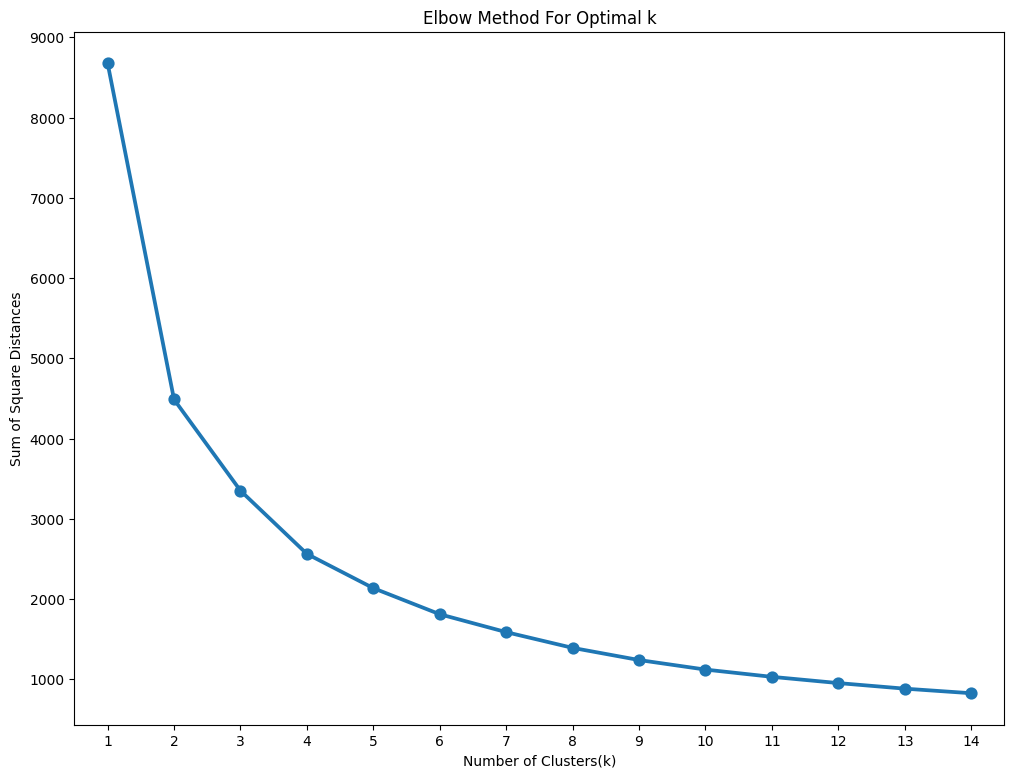

In [83]:
#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(12,9))
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

So giving n_clusters=2 on Kmeans Model.

### ML Model - 1 K-Means Clustering

In [84]:
# ML Model - 1 Implementation

kmeans = KMeans(n_clusters=2)

# Fit the Algorithm

kmeans.fit(X)

# Predict on the model
y_kmeans= kmeans.predict(X)


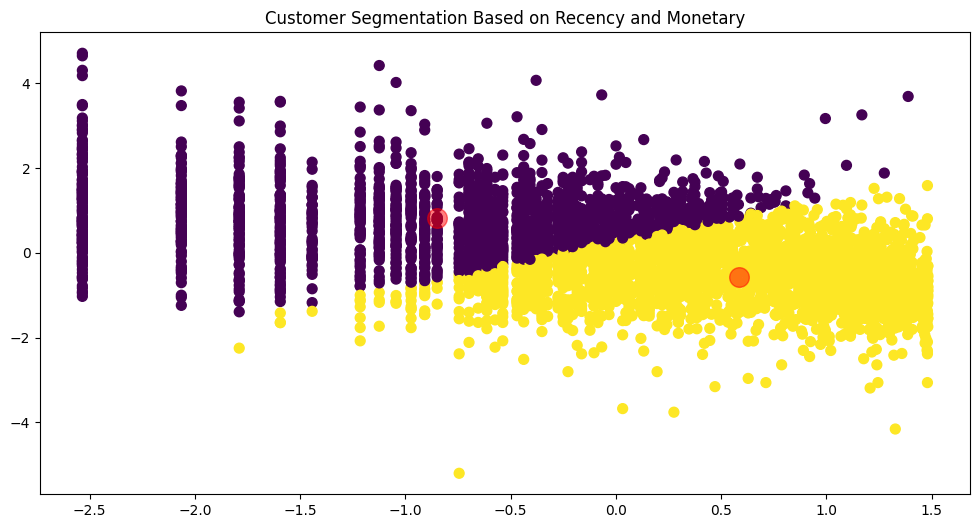

In [85]:
# Visualizing evaluation Metric Score chart

plt.figure(figsize=(12,6))
plt.title('Customer Segmentation Based on Recency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

Observing the clustering results based on Recency and Monetary, it's apparent that customers are distinctly separated into groups.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


I utilized K-means Clustering to segment customers based on provided features. Employing both the Elbow and Silhouette Methods, I determined that the most efficient number of clusters, n_clusters, was 2 for our model. Subsequently, the model was fitted using K-means, and each data point was assigned a cluster label using the KMeans.labels attribute.

####2. Explain business impact of the ML model used.


K-means clustering is valuable for segmenting customers using a variety of data types, including demographic, psychographic, and behavioral data, as well as performance metrics. This segmentation aids in devising tailored business strategies for different customer segments within specific product categories, thereby facilitating customer retention and fostering business growth.

### ML Model - 2 DBSCAN Algorithm on Recency and Monetary

In [87]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)

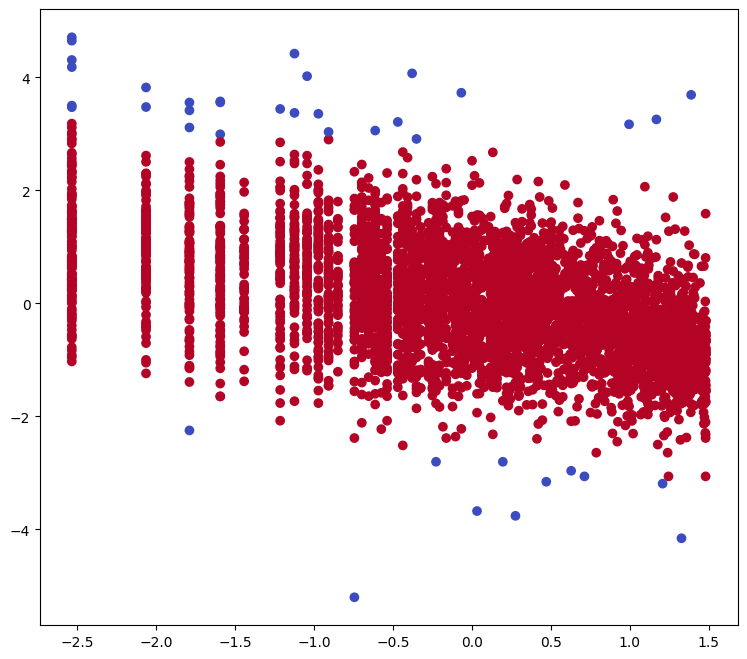

In [88]:
# Visualizing evaluation Metric Score chart
plt.figure(figsize=(9,8))
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap='coolwarm')
plt.show()


We observe that customers are clearly distinguished when clustered based on their Recency and Monetary attributes.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The ML technique applied is DBSCAN (Density-Based Spatial Clustering of Applications with Noise). This unsupervised algorithm categorizes data points according to their density and proximity, making it adept at uncovering clusters of irregular shapes and managing datasets with differing densities.

###Applying silhouette Score Method on Frquency and Monetary

In [90]:
features_fre_mon=['Frequency_log','Monetary_log']
X_features_fre_mon=rfm[features_fre_mon].values
scaler_fre_mon=preprocessing.StandardScaler()
X_fre_mon=scaler_fre_mon.fit_transform(X_features_fre_mon)
X=X_fre_mon
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.4784219914021605
For n_clusters = 3, silhouette score is 0.40778210564140044
For n_clusters = 4, silhouette score is 0.37231574190398775
For n_clusters = 5, silhouette score is 0.3466695882675493
For n_clusters = 6, silhouette score is 0.3610711205940996
For n_clusters = 7, silhouette score is 0.3448623810510324
For n_clusters = 8, silhouette score is 0.35170416731028137
For n_clusters = 9, silhouette score is 0.3442467077144302
For n_clusters = 10, silhouette score is 0.35840952862240494
For n_clusters = 11, silhouette score is 0.3669348061790903
For n_clusters = 12, silhouette score is 0.35439292923842536
For n_clusters = 13, silhouette score is 0.3632454381269567
For n_clusters = 14, silhouette score is 0.35661644890092936
For n_clusters = 15, silhouette score is 0.35894294506374835


###Applying Elbow Method on Frequency and Monetary

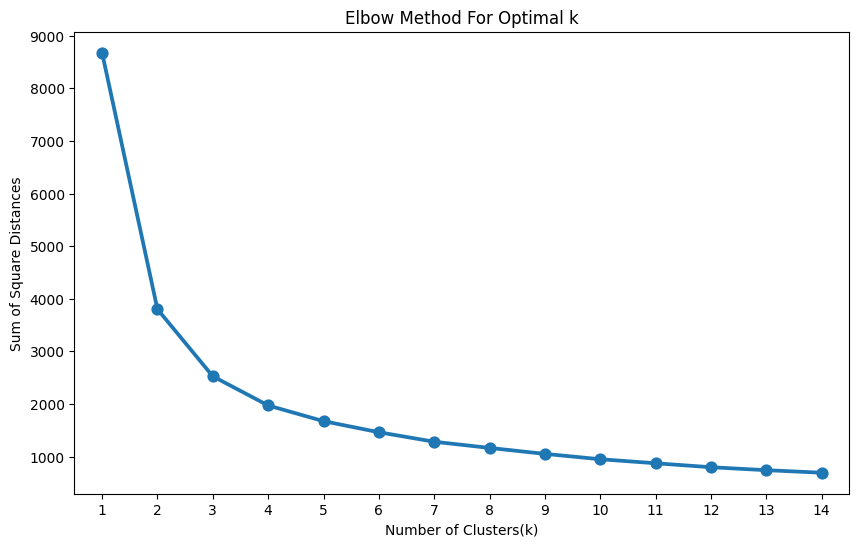

In [91]:
plt.figure(figsize=(10,6))
sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_

#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [92]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

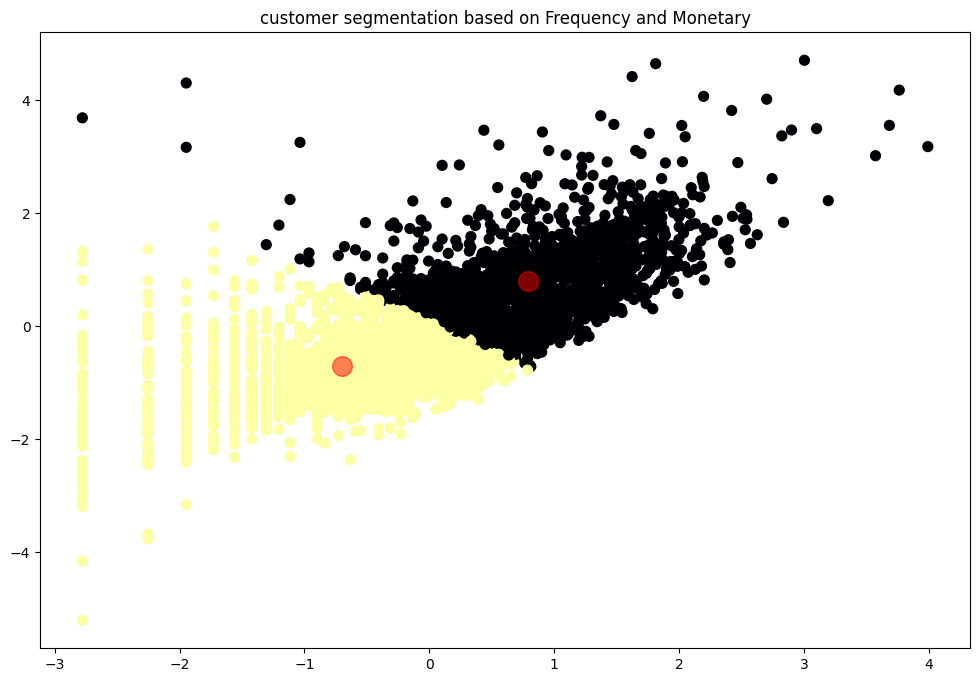

In [93]:
plt.figure(figsize=(12,8))
plt.title('customer segmentation based on Frequency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='inferno')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

We observe that customers are distinctly separated when clustered based on their Frequency and Monetary attributes.

###Applying DBSCAN to Method on Frequency and Monetary

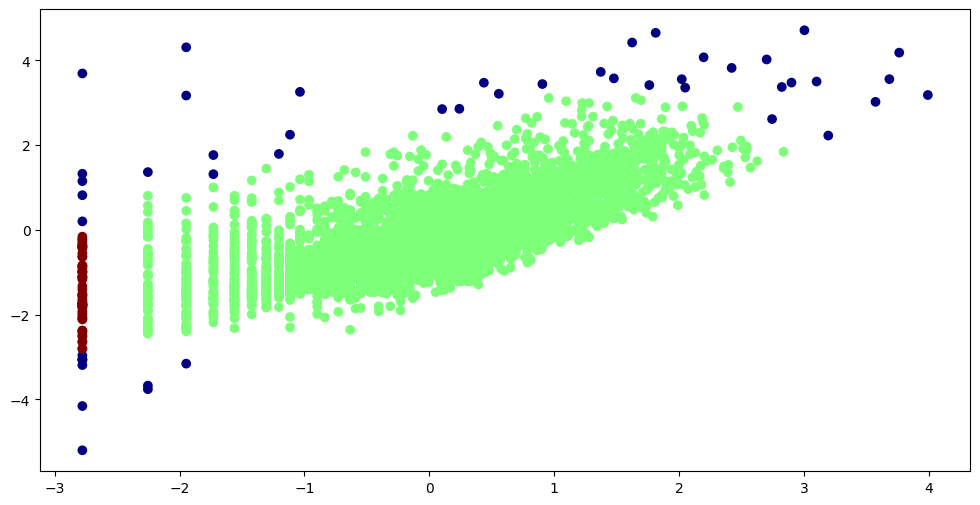

In [94]:
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(12,6))
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap='jet')


We see that customers are effectively distinguished when clustered based on their Frequency and Monetary characteristics.






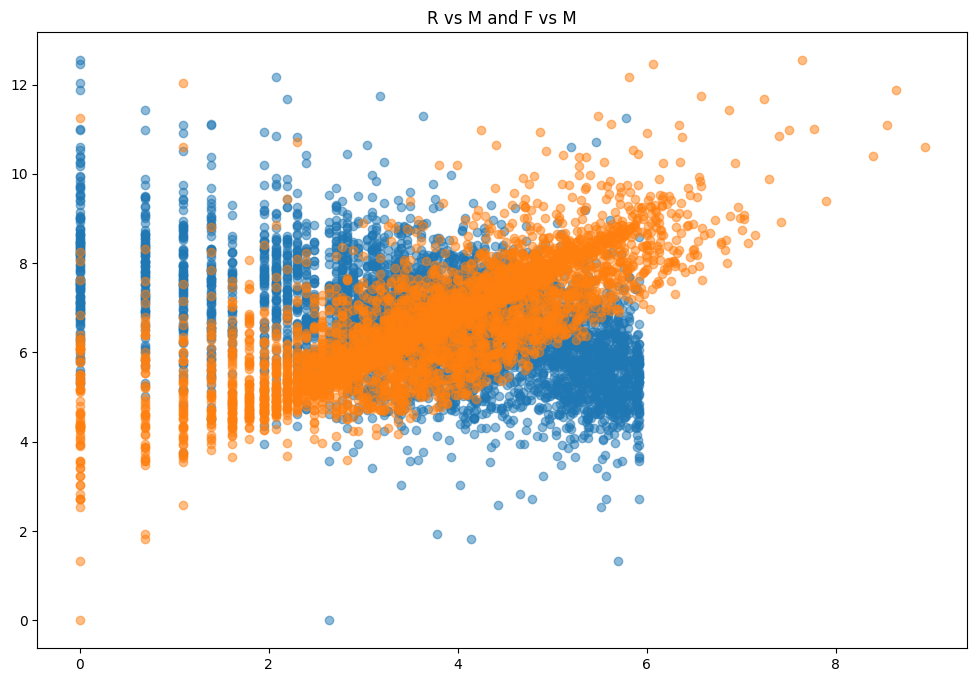

In [95]:
plt.figure(figsize=(12,8))
plt.title('R vs M and F vs M')
plt.scatter(rfm.Recency_log,rfm.Monetary_log,alpha=0.5)
plt.scatter(rfm.Frequency_log,rfm.Monetary_log,alpha=0.5)

###Applying Silhouette Method on Recency ,Frequency and Monetary

In [96]:
feature_vector=['Recency_log','Frequency_log','Monetary_log']
X_features=rfm[feature_vector].values
scaler=preprocessing.StandardScaler()
X=scaler.fit_transform(X_features)

For n_clusters = 2 The average silhouette_score is : 0.395588261083924
For n_clusters = 3 The average silhouette_score is : 0.3056346992700891
For n_clusters = 4 The average silhouette_score is : 0.30270317426951315
For n_clusters = 5 The average silhouette_score is : 0.2792460561657022
For n_clusters = 6 The average silhouette_score is : 0.27920490924462127
For n_clusters = 7 The average silhouette_score is : 0.26639589282641335
For n_clusters = 8 The average silhouette_score is : 0.26439181568270587
For n_clusters = 9 The average silhouette_score is : 0.2530950678302339
For n_clusters = 10 The average silhouette_score is : 0.2523587969335804
For n_clusters = 11 The average silhouette_score is : 0.26053571388536995
For n_clusters = 12 The average silhouette_score is : 0.2658660395456048
For n_clusters = 13 The average silhouette_score is : 0.2633746937000211
For n_clusters = 14 The average silhouette_score is : 0.25492771945211434
For n_clusters = 15 The average silhouette_score is : 

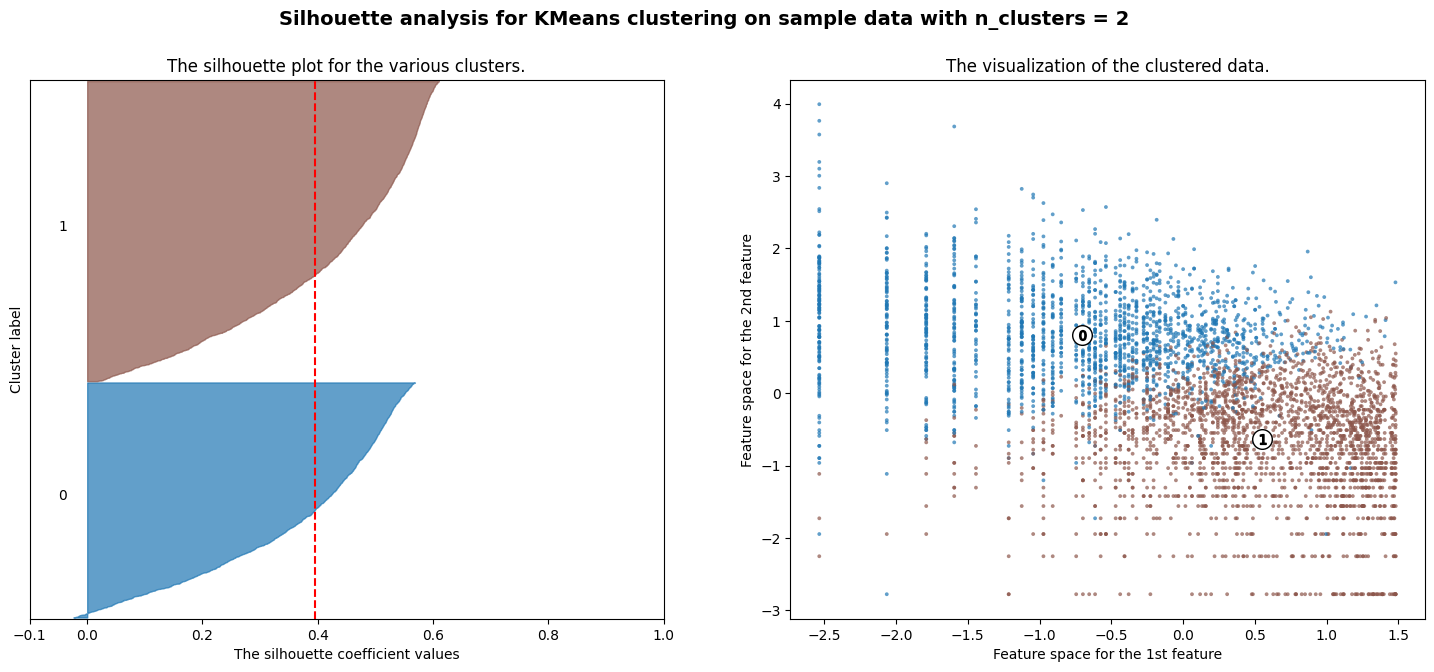

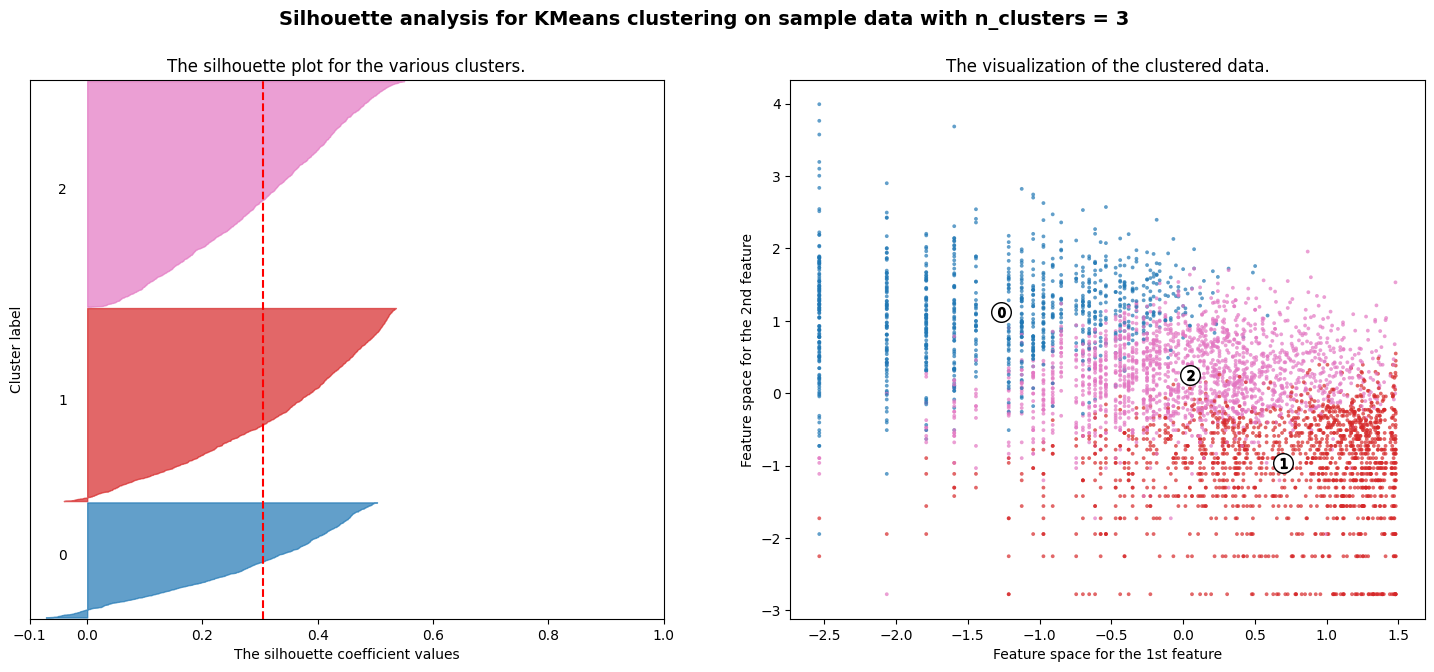

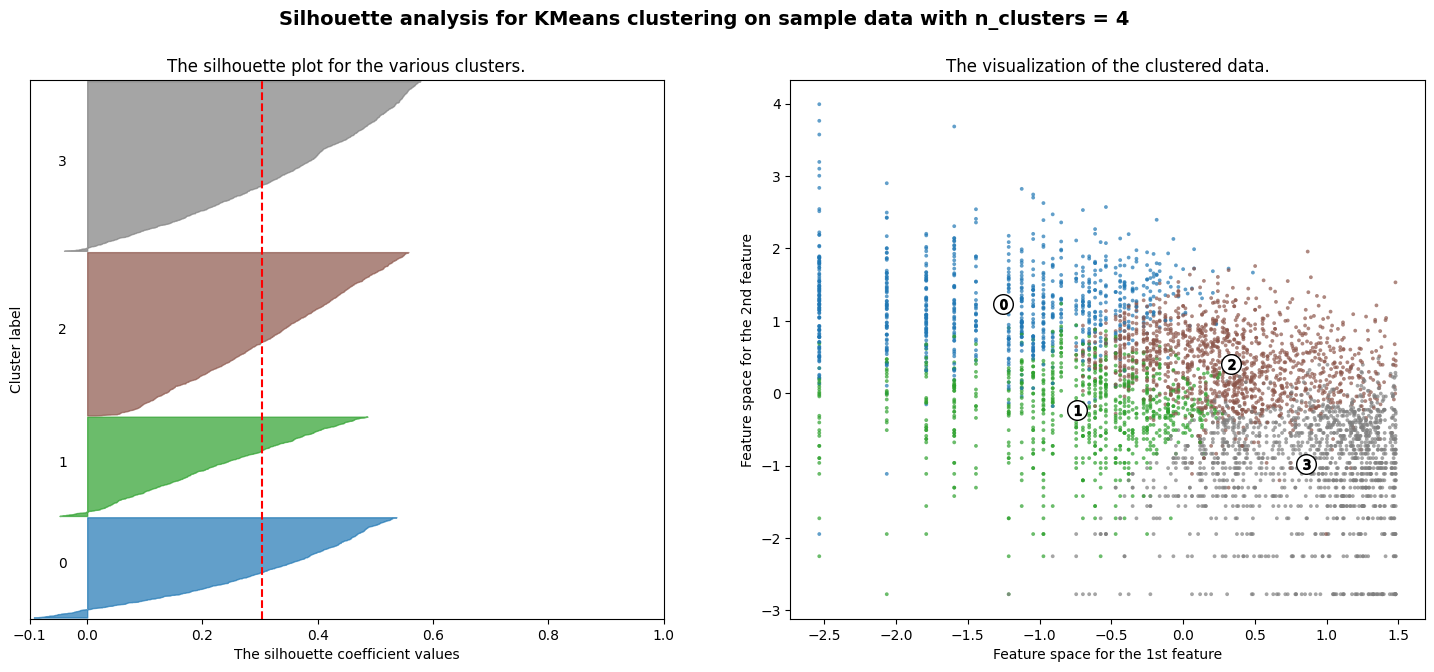

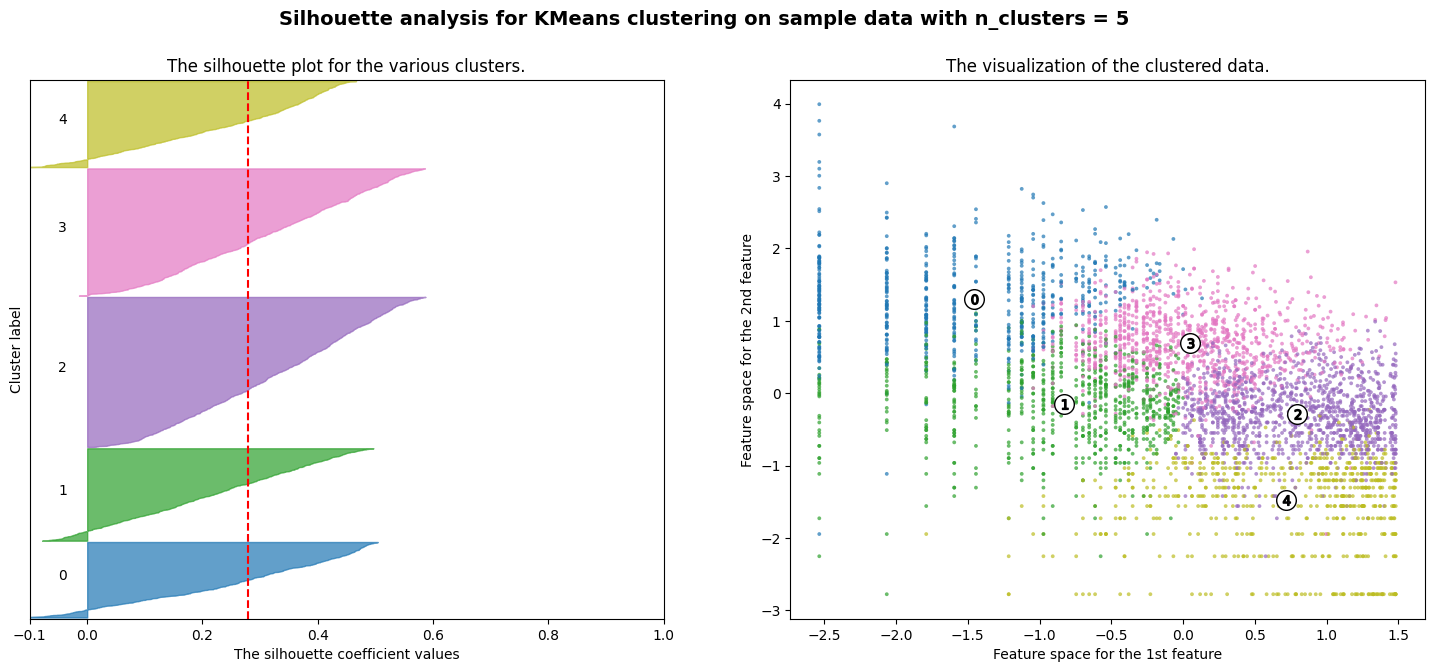

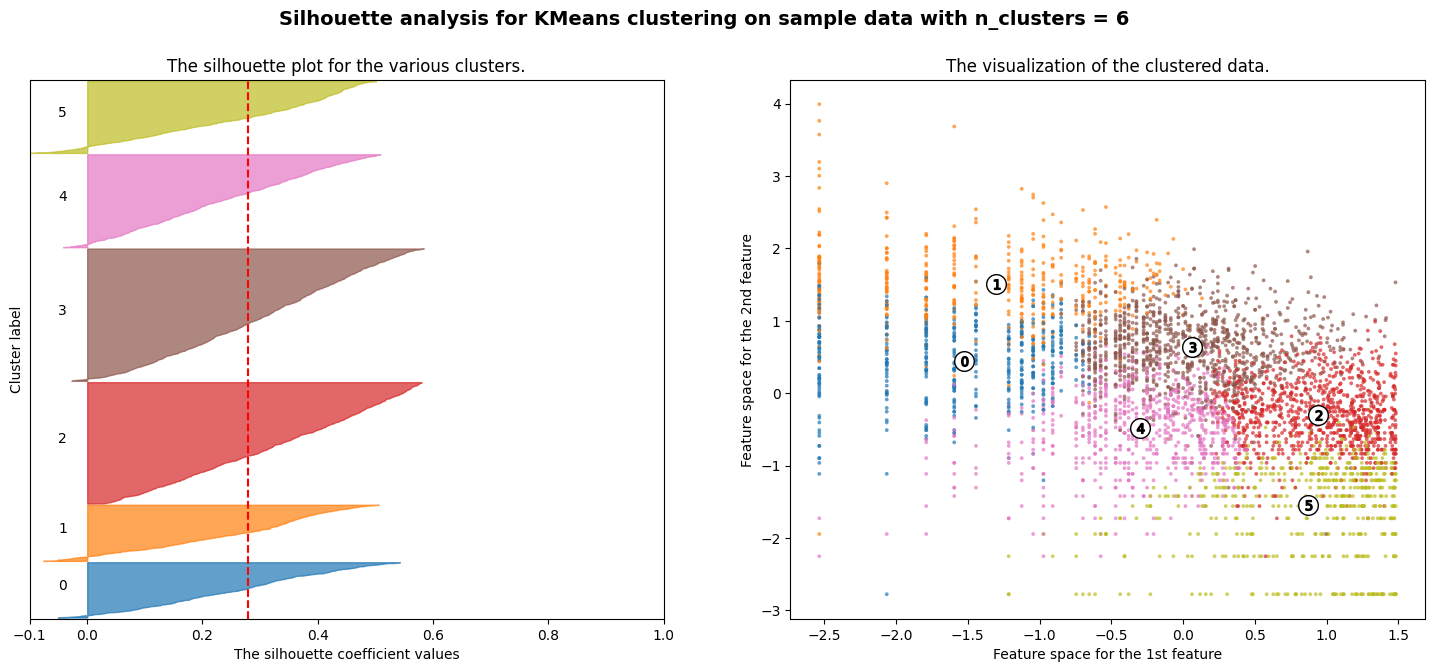

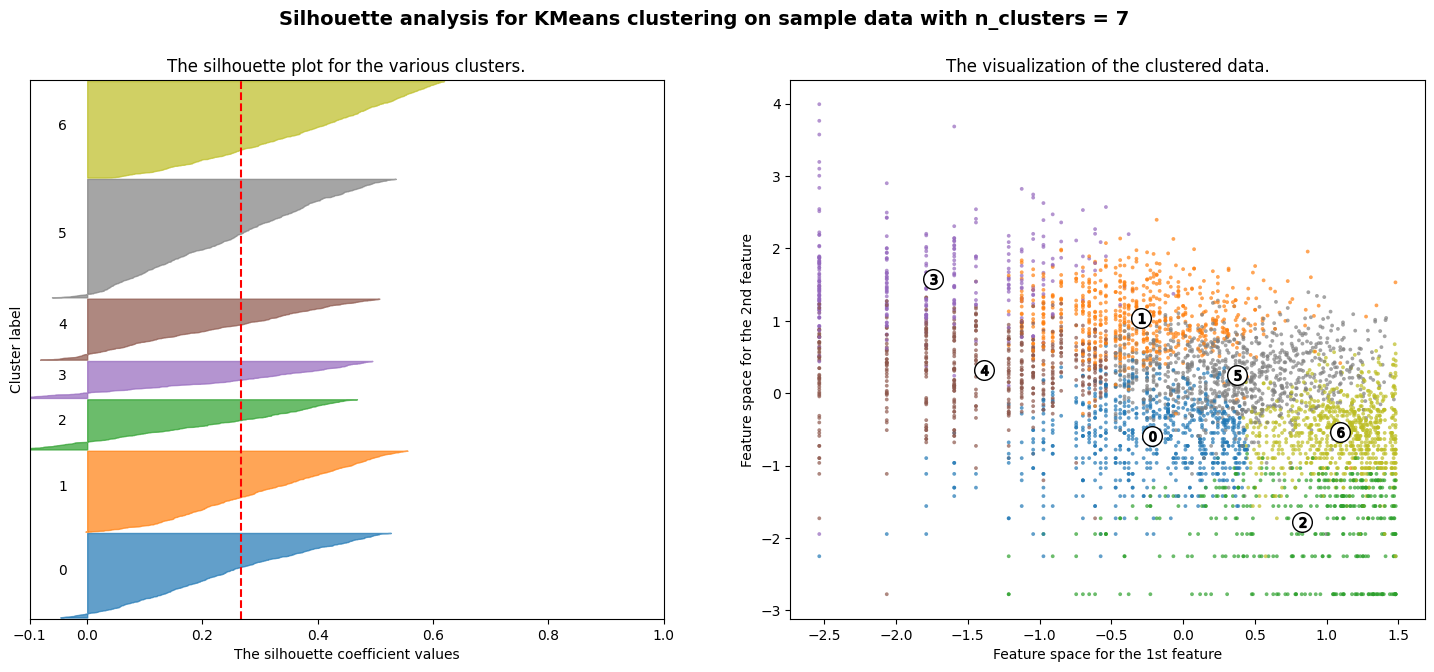

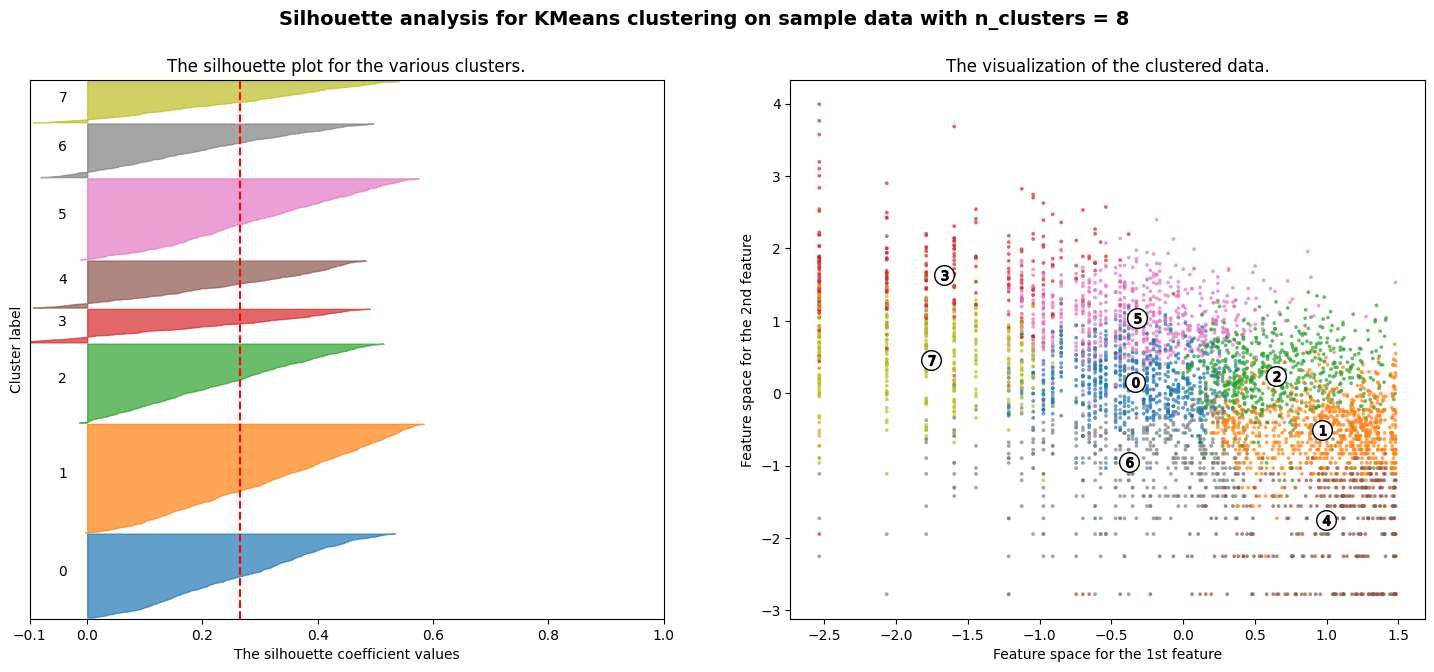

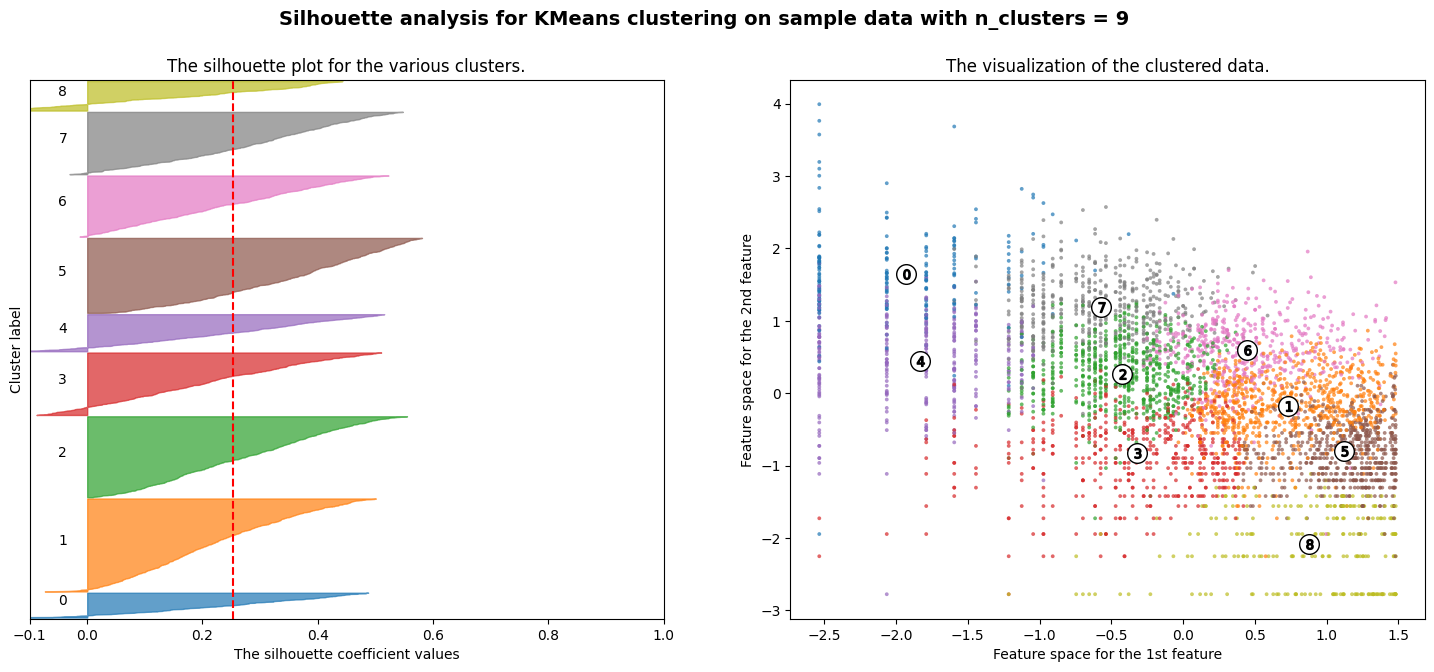

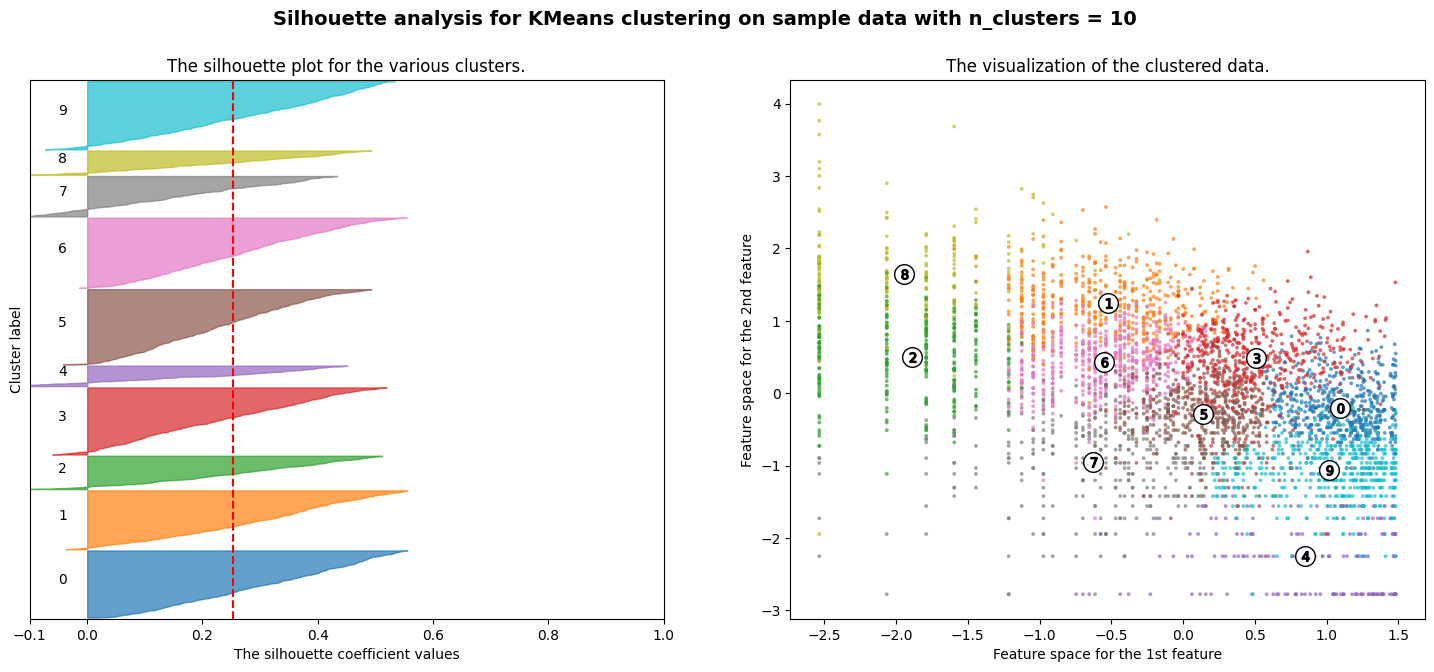

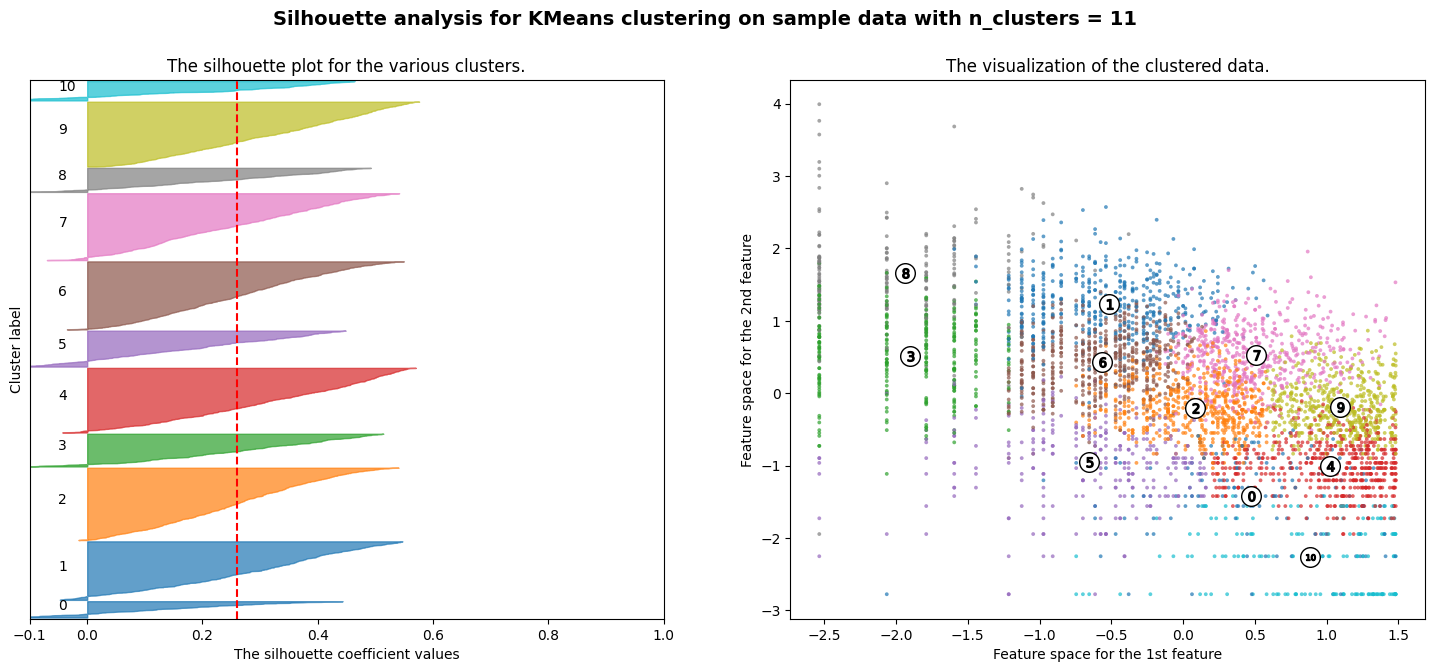

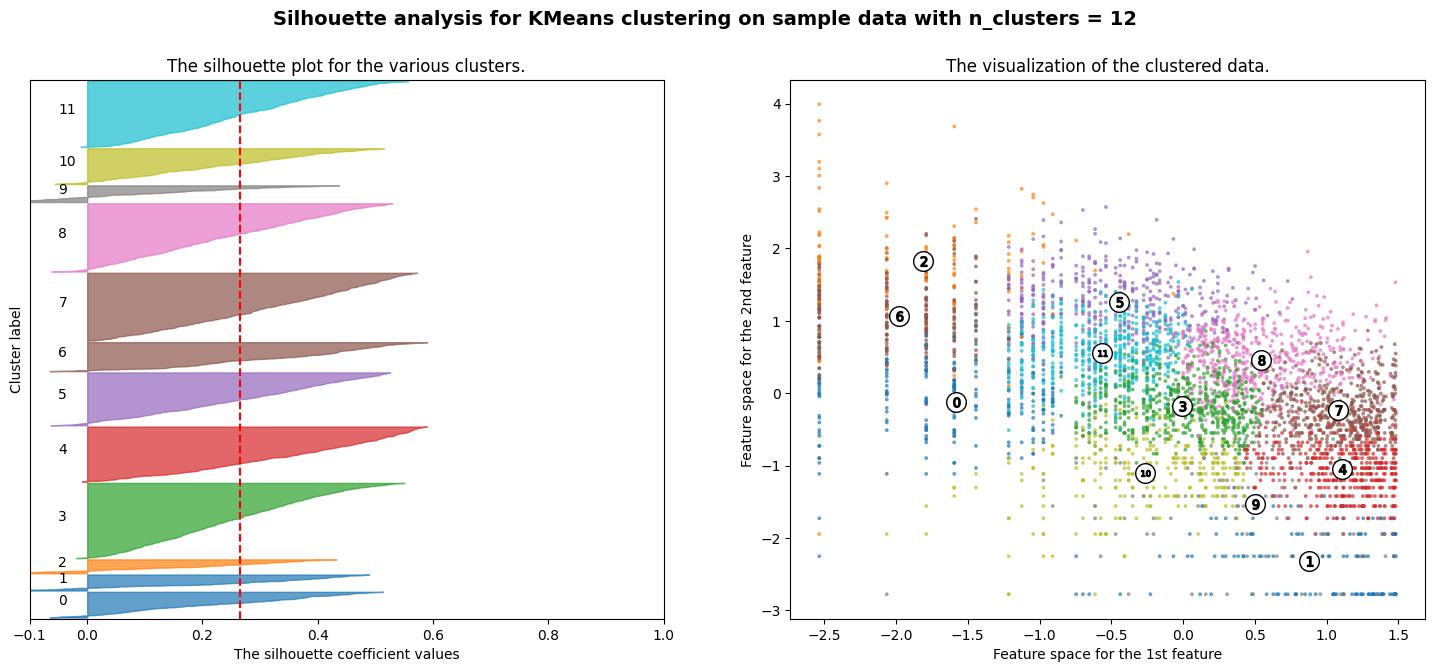

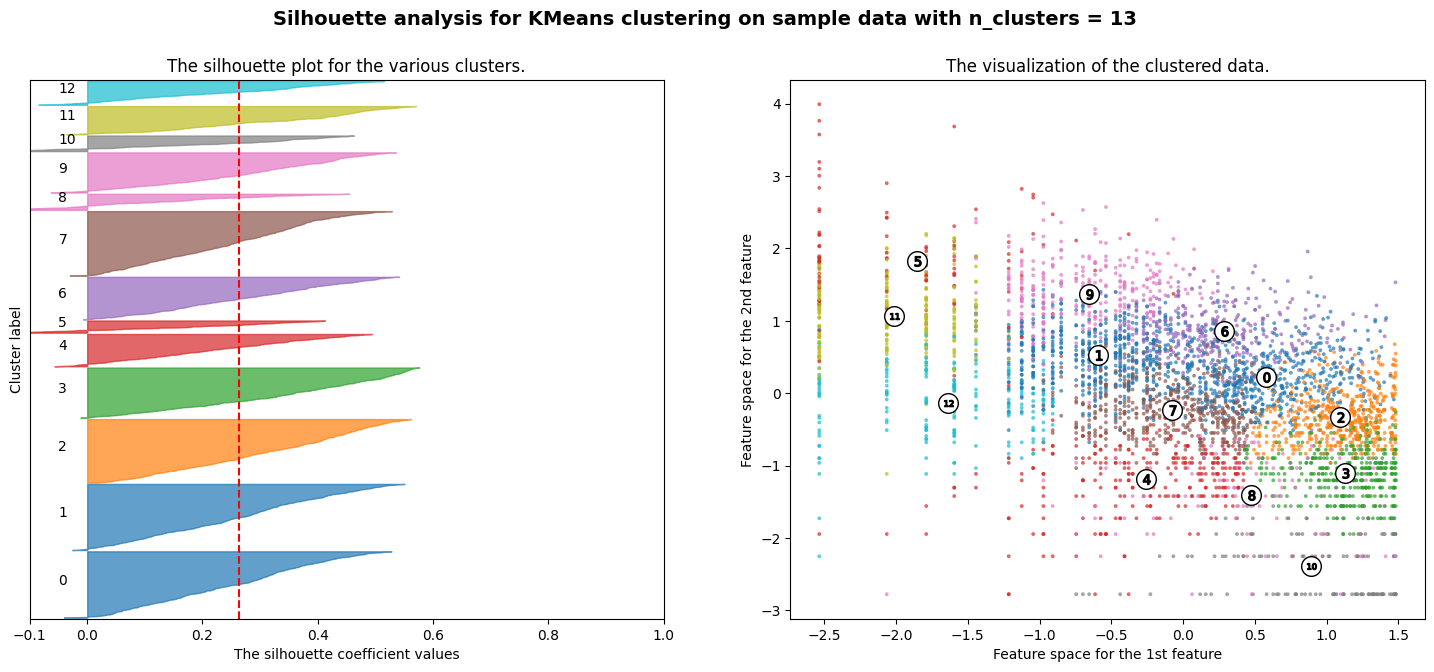

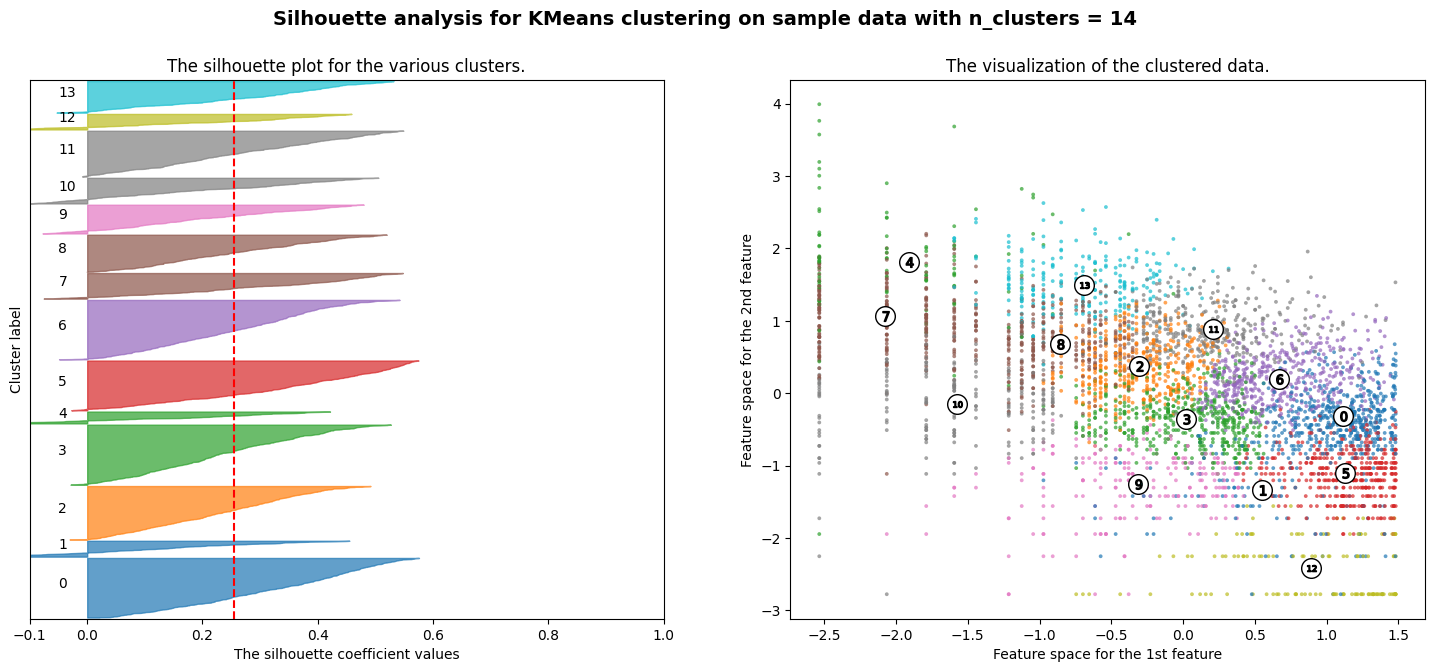

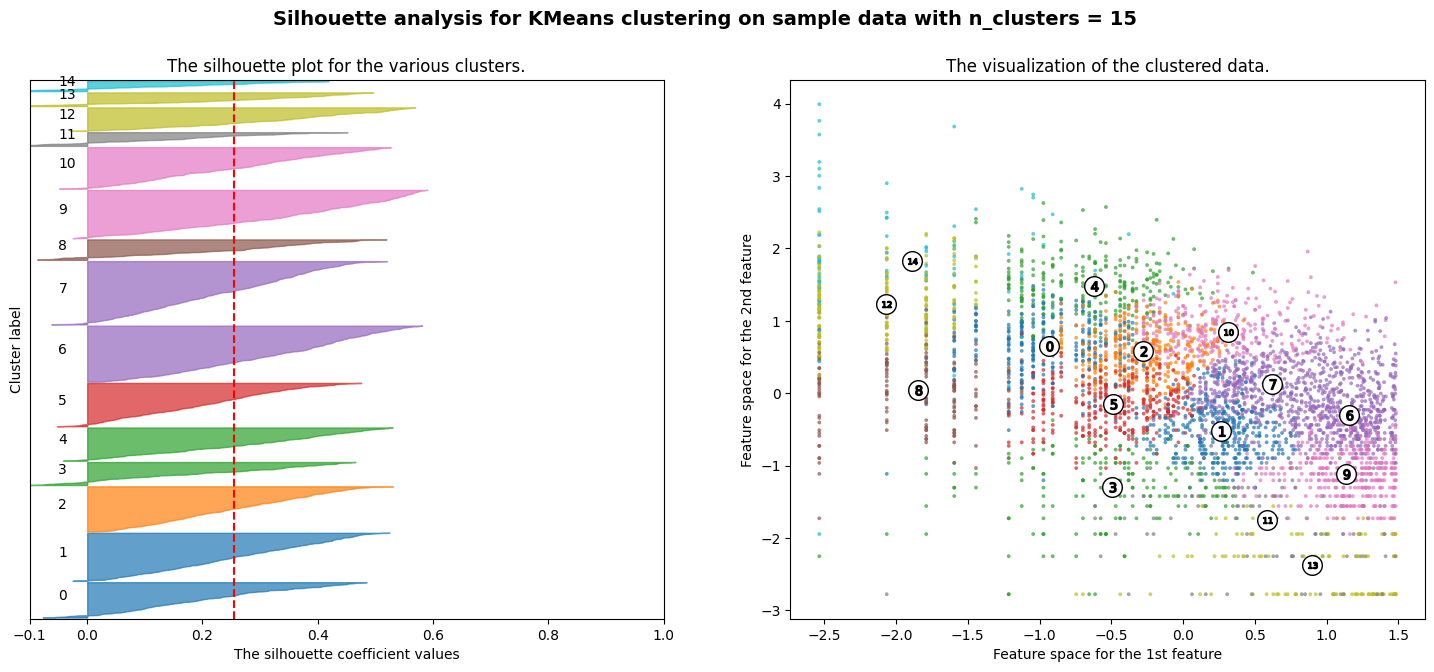

In [97]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.tab10(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.tab10(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [98]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

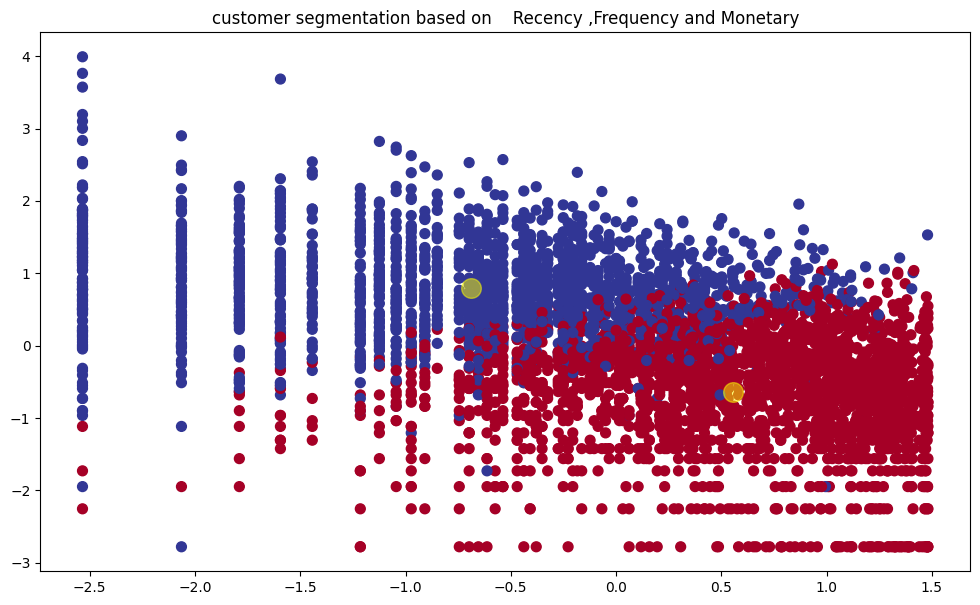

In [99]:
plt.figure(figsize=(12,7))
plt.title('customer segmentation based on    Recency ,Frequency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='RdYlBu')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=200, alpha=0.5)
plt.show()

We observe that ,Customers are well separate when we cluster them by Recency ,Frequency and Monetary

###Applying Elbow Method on Recency ,Frequency and Monetary

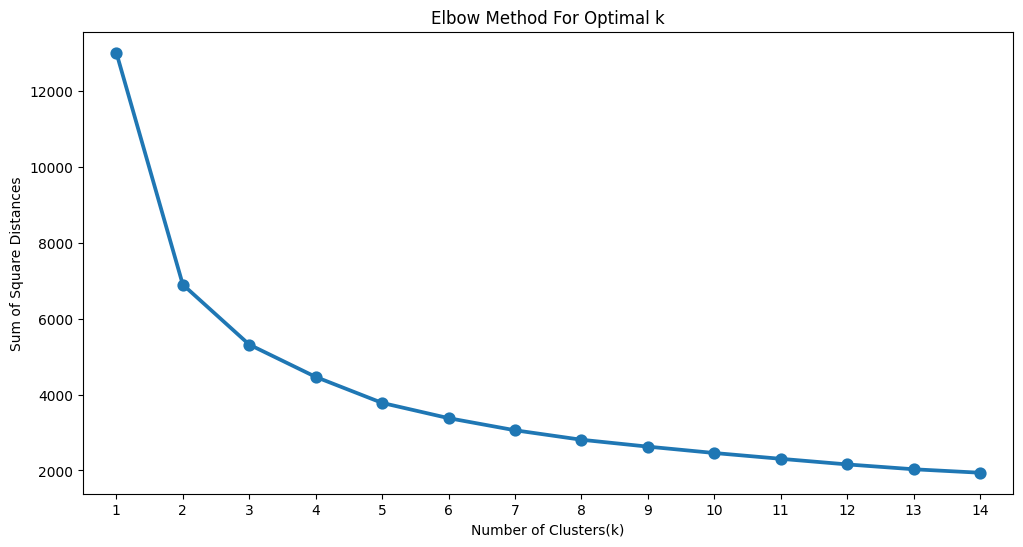

In [100]:
sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_

#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(12,6))
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [101]:
#Perform K-Mean Clustering or build the K-Means clustering model
KMean_clust = KMeans(n_clusters= 2, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(X)

#Find the clusters for the observation given in the dataset
rfm['Cluster'] = KMean_clust.labels_
rfm.head(10)

Recency  Frequency  Monetary  R  F  M RFMGroup  RFMScore  \
CustomerID                                                             
12346.0         325          1  77183.60  4  4  1      441         9   
12347.0           2        182   4310.00  1  1  1      111         3   
12348.0          75         31   1797.24  3  3  1      331         7   
12349.0          18         73   1757.55  2  2  1      221         5   
12350.0         310         17    334.40  4  4  3      443        11   
12352.0          36         85   2506.04  2  2  1      221         5   
12353.0         204          4     89.00  4  4  4      444        12   
12354.0         232         58   1079.40  4  2  2      422         8   
12355.0         214         13    459.40  4  4  3      443        11   
12356.0          22         59   2811.43  2  2  1      221         5   

            Recency_log  Frequency_log  Monetary_log  Cluster  
CustomerID                                                     
12346.0        5.783825       0.000000     11.253942        1  
12347.0        0.693147       5.204007      8.368693        0  
12348.0        4.317488       3.433987      7.494007        1  
12349.0        2.890372       4.290459      7.471676        0  
12350.0        5.736572       2.833213      5.812338        1  
12352.0        3.583519       4.442651      7.826459        0  
12353.0        5.318120       1.386294      4.488636        1  
12354.0        5.446737       4.060443      6.984161        1  
12355.0        5.365976       2.564949      6.129921        1  
12356.0        3.091042       4.077537      7.941449        0

### ML Model - 3-**Hierarchical Clustering**


A dendrogram is a graphical representation resembling a tree, depicting the sequence of merges or splits in hierarchical clustering. The vertical lines in the dendrogram indicate the distance between clusters: the greater the distance, the longer the vertical line. By setting a threshold distance, represented by a horizontal line, we can segment the dendrogram. Typically, the threshold is set to intersect the tallest vertical line without crossing any other horizontal lines, thus finding the maximum vertical distance.

####Dendogram to find the optimal number of clusters

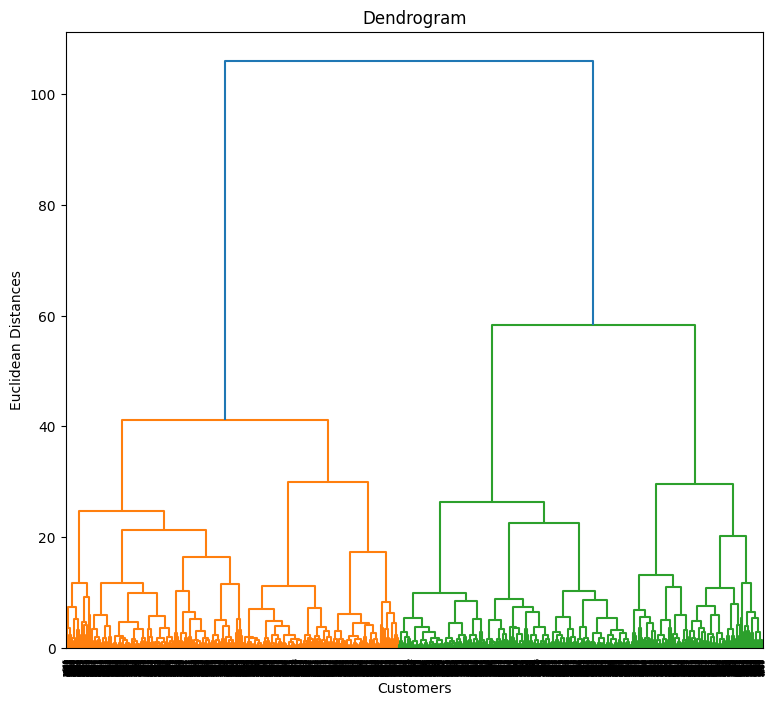

In [102]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(9,8))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()  # Finding the largest vertical distance we can make without crossing any other horizontal line


The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold=90

No. of Cluster = 2

In [103]:
# ML Model - 3 Implementation
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')

# Fit the Algorithm
y_hc = hc.fit_predict(X)

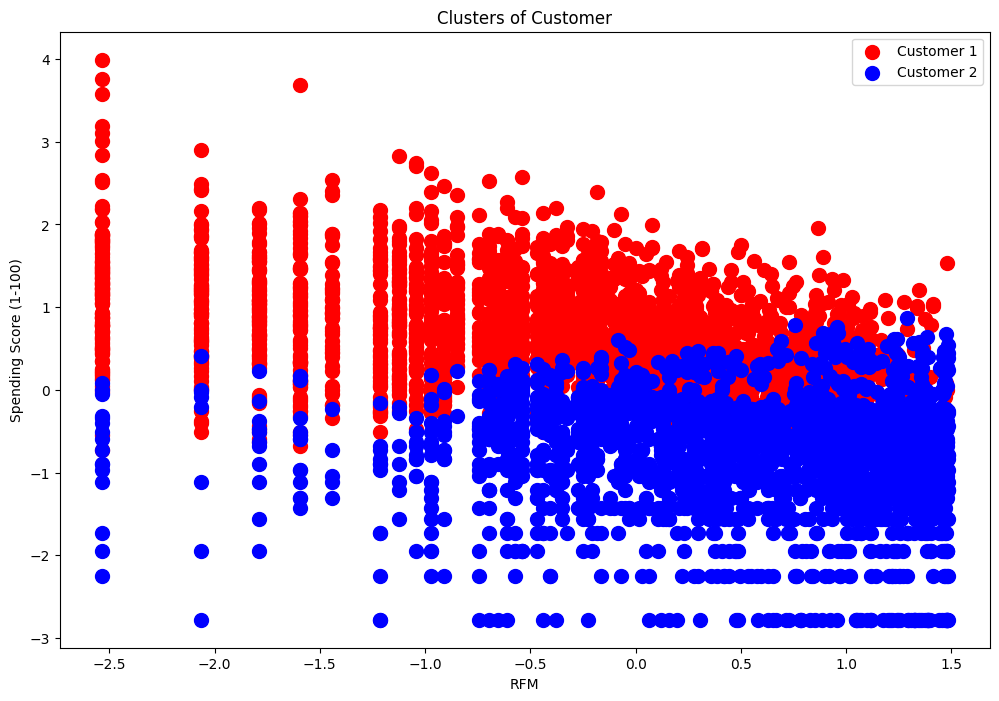

In [104]:
# Visualizing evaluation Metric Score chart

# Visualizing the clusters (two dimensions only)
plt.figure(figsize=(12,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Customer 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Customer 2')
#plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Target')

plt.title('Clusters of Customer')
plt.xlabel('RFM')

plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


After experimenting with various clustering algorithms on our dataset, we determined that the optimal number of clusters is 2.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The ML model used is Agglomerative Clustering. Agglomerative Clustering is a hierarchical clustering algorithm that starts with each data point as an individual cluster and iteratively merges the clusters based on a specified linkage criterion. In this case, the "ward" linkage criterion is used, which minimizes the variance within each cluster.

####Applying DBSCAN to Recency ,Frequency and Monetary

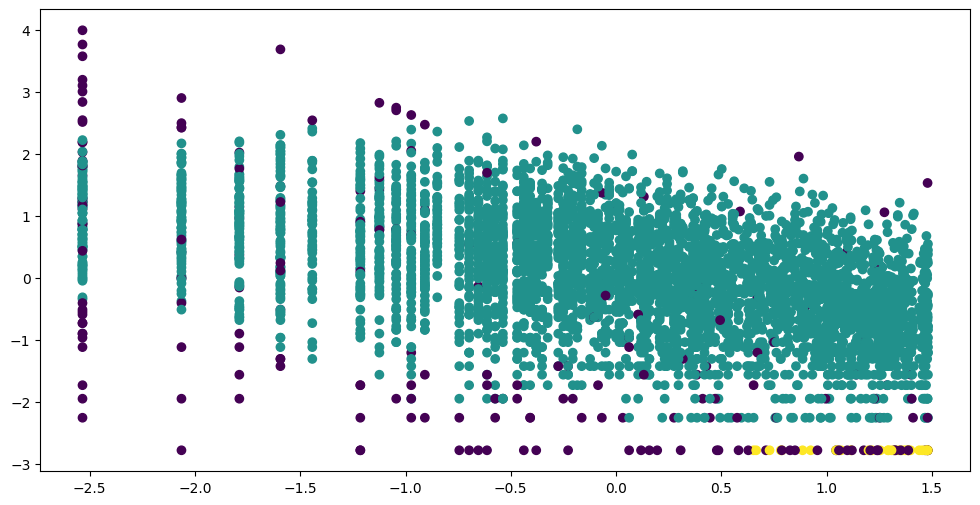

In [107]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(12,6))
plt.scatter(X[:,0], X[:,1], c=y_pred)

We observed that customers are effectively separated into distinct groups based on their Recency, Frequency, and Monetary attributes. Through analysis, we determined that the optimal number of clusters is 3.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

In our project, after examining various models and datasets, we consistently found that the optimal number of clusters is 2. To gauge the positive business outcomes of customer segmentation, we focused on two evaluation metrics: the silhouette score and the elbow method for K-means clustering.

The silhouette score assesses cluster quality and cohesion. A higher silhouette score signifies well-defined clusters with minimal overlap, aiding in targeting specific customer segments with tailored marketing strategies.

Meanwhile, the elbow method aids in determining the optimal number of clusters by analyzing the within-cluster sum of squares. This method helps strike a balance between maximizing cluster separation and minimizing segmentation complexity, ensuring practicality for business implementation.

By prioritizing these evaluation metrics, we aim to create distinct and interpretable customer segments that can drive positive business outcomes through targeted marketing, personalized customer experiences, and enhanced satisfaction.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?


I chose to use K-means clustering for customer segmentation due to several key reasons:

Scalability: K-means clustering is efficient and can handle large datasets commonly found in online businesses, making it suitable for analyzing vast amounts of customer data.

Interpretability: The results produced by K-means clustering are straightforward to understand. Each customer is assigned to a specific cluster based on their similarity in feature values, allowing for easy interpretation and analysis of the resulting segments.

Applicability to Online Data: K-means clustering is versatile and can accommodate various types of features, such as demographic information, purchase behavior, and browsing patterns collected from online platforms. This flexibility enables the algorithm to capture different aspects of customer behavior and effectively group customers into meaningful segments based on their similarities.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [108]:
# Save the File
import pickle

# Assuming your best performing model is stored in the variable 'best_model'
# Save the model to a pickle file
with open('kmeans .pkl', 'wb') as f:
    pickle.dump(kmeans, f)

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [109]:
# Load the File and predict unseen data.
from prettytable import PrettyTable

# Specify the Column Names while initializing the Table
myTable = PrettyTable(['SL No.',"Model_Name",'Data', "Optimal_Number_of_cluster"])

# Add rows
myTable.add_row(['1',"K-Means with silhouette_score ", "RM", "2"])
myTable.add_row(['2',"K-Means with Elbow methos  ", "RM", "2"])
myTable.add_row(['3',"DBSCAN ", "RM", "2"])
myTable.add_row(['4',"K-Means with silhouette_score ", "FM", "2"])
myTable.add_row(['5',"K-Means with Elbow methos  ", "FM", "2"])
myTable.add_row(['6',"DBSCAN ", "FM", "2"])
myTable.add_row(['7',"K-Means with silhouette_score ", "RFM", "2"])
myTable.add_row(['8',"K-Means with Elbow methos  ", "RFM", "2"])
myTable.add_row(['9',"Hierarchical clustering  ", "RFM", "2"])
myTable.add_row(['10',"DBSCAN ", "RFM", "3"])
print(myTable)

+--------+--------------------------------+------+---------------------------+
| SL No. |           Model_Name           | Data | Optimal_Number_of_cluster |
+--------+--------------------------------+------+---------------------------+
|   1    | K-Means with silhouette_score  |  RM  |             2             |
|   2    |  K-Means with Elbow methos     |  RM  |             2             |
|   3    |            DBSCAN              |  RM  |             2             |
|   4    | K-Means with silhouette_score  |  FM  |             2             |
|   5    |  K-Means with Elbow methos     |  FM  |             2             |
|   6    |            DBSCAN              |  FM  |             2             |
|   7    | K-Means with silhouette_score  | RFM  |             2             |
|   8    |  K-Means with Elbow methos     | RFM  |             2             |
|   9    |   Hierarchical clustering      | RFM  |             2             |
|   10   |            DBSCAN              | RFM  |  

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Our customer segmentation analysis involved several key steps. We initiated with data wrangling to address null values, duplicates, and feature modifications. Following this, exploratory data analysis was conducted to extract insights from the dataset's features.

We then developed quantitative metrics, such as recency, frequency, and monetary (RFM) scores, for each customer. Utilizing these RFM features, we applied the KMeans clustering algorithm to segment customers. Additionally, silhouette and elbow method analyses were performed to identify the optimal number of clusters, which was determined to be 2. Notably, one cluster comprised customers with high recency and low frequency and monetary values, while the other cluster included customers with low recency and high frequency and monetary values.

Nevertheless, there are opportunities for further refinement in our analysis. Depending on company objectives and preferences, one may opt to segment customers into additional clusters. Furthermore, the labeled features resulting from clustering could be integrated into supervised machine learning algorithms for predicting classes for new observations.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***